# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bases de dados exploradas

df_empreend = pd.read_csv('../dados/simu-carteira-mun-T.csv')
df_acidentes = pd.read_csv('../dados/acidentes_de_transportes.csv')

df_feridos = pd.read_csv('../dados/simu-feridos-mun-T.csv')
df_mortes = pd.read_csv('../dados/simu-mortes-mun-T.csv')
df_pemob = pd.read_csv('../dados/simu-pemob-mun_T.csv') #Pesquisa Nacional de Mobilidade Urbana - PEMOB
df_acesso_sistema = pd.read_csv("../dados/simu.csv")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importa bases

In [2]:
print('Tamanho: ',df_empreend.shape)
df_empreend.head()

Tamanho:  (71248, 91)


,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF,Região,uf_REGIAO,Município,mun_coordenadas
0,1-38001,319910.0,38001.0,0.0,375658.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881"
1,1-38002,319912.0,38002.0,0.0,375664.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881"
2,1-38003,319914.0,38003.0,0.0,375666.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881"
3,1-38004,354485.0,38004.0,0.0,NaN,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-38005,345051.0,38005.0,0.0,377438.0,PAC_MCID,MINISTERIO DAS CIDADES,FIN,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SE,Sudeste,NaN,NaN


In [3]:
print('Tamanho: ',df_acidentes.shape)
df_acidentes.head()


Tamanho:  (55700, 56)


,Código IBGE,ano,Região,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,...,Outros_feridos,total_feridos,taxa_mun_feridos,taxa_mun_pedestre_feridos,taxa_mun_ciclista_feridos,taxa_mun_motociclista_feridos,taxa_mun_automovel_feridos,taxa_mun_veiculo_pesado_feridos,taxa_mun_onibus_feridos,taxa_mun_outros_feridos
0,1100015,2010,N,Alta Floresta D'Oeste,2,0,5,0,0,0,...,0,13.0,53.2962,0.0000,0.0000,53.2962,0.0000,0.0,0.0,0.0000
1,1100023,2010,N,Ariquemes,0,1,2,0,0,0,...,3,43.0,47.5911,0.0000,1.1068,40.9505,2.2135,0.0,0.0,3.3203
2,1100031,2010,N,Cabixi,0,0,0,0,0,0,...,0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000
3,1100049,2010,N,Cacoal,2,1,17,0,4,0,...,1,57.0,72.5431,63.6343,1.2727,6.3634,0.0000,0.0,0.0,1.2727
4,1100056,2010,N,Cerejeiras,3,0,1,0,0,0,...,0,1.0,5.8723,0.0000,5.8723,0.0000,0.0000,0.0,0.0,0.0000


In [4]:
df_empreend.columns

Index(['cod_mdr', 'cod_operacao', 'cod_saci', 'cod_convenio_siafi',
       'cod_ag_operador', 'origem', 'dsc_concedente', 'dsc_fonte',
       'dsc_unidade', 'cod_proposta', 'dsc_situacao_contrato_mdr',
       'bln_carteira_mdr', 'bln_carteira_mdr_ativo', 'dsc_situacao_objeto_mdr',
       'dsc_paralisada_mdr', 'bln_ativo', 'bln_ativo_boolean', 'cod_id_fonte',
       'cod_id_pac', 'programa', 'acao', 'uf_SIGLA_UF', 'mun_MUNNOMEX',
       'Código IBGE', 'empreendimento', 'vlr_repasse_financiamento',
       'vlr_contrapartida', 'vlr_empenhado', 'vlr_desembolsado',
       'vlr_desbloqueado', 'vlr_desembolsado_19', 'vlr_desembolsado_20',
       'vlr_desembolsado_21', 'situacao_obra', 'situacao_obra_base_validacao',
       'situacao_contrato', 'prc_fisico', 'dte_assinatura', 'dte_inicio_obra',
       'dte_fim_obra', 'dte_ult_desembolso', 'dte_ult_desbloqueio',
       'dte_ult_ref_bm', 'vlr_ult_desembolso', 'vlr_ult_repasse_desbloqueado',
       'vlr_ult_contrapartida_desbloqueado', 'agente_fi

In [5]:
df_acidentes.columns

Index(['Código IBGE', 'ano', 'Região', 'Município', 'Pedestre_mortes',
       'Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',
       'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes',
       'Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes',
       'Populacao', 'total_mortes', 'taxa_mun_mortes',
       'taxa_mun_pedestre_mortes', 'taxa_mun_ciclista_mortes',
       'taxa_mun_motociclista_mortes', 'taxa_mun_automovel_mortes',
       'taxa_mun_veiculo_pesado_mortes', 'taxa_mun_onibus_mortes',
       'taxa_mun_outros_mortes', 'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_AMAZONIA',
       'mun_FRONTEIRA', 'mun_CAPITAL', 'mun_LATITUDE', 'mun_LONGITUDE',
       'mun_ALTITUDE', 'mun_AREA', 'mun_codigo_adotado', 'uf_SIGLA_UF',
       'uf_CODIGO_UF', 'uf_NOME_UF', 'uf_REGIAO', 'mun_coordenadas',
       'Pedestre_feridos', 'Ciclista_feridos', 'Motociclista_feridos',
       'Ocup_triciclo_motor_feridos', 'Ocup_automovel_feridos',
       'Ocup_caminhonete_ferid

## Bases adicionais

In [6]:
print('Tamanho: ',df_feridos.shape)
df_feridos.head()

Tamanho:  (55700, 39)


,Código IBGE,ano,Região,UF,Município,Pedestre,Ciclista,Motociclista,Ocup triciclo motor,Ocup automovel,...,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_SIGLA_UF,uf_CODIGO_UF,uf_NOME_UF,uf_REGIAO,mun_coordenadas
0,1100015,2010,N,RO,Alta Floresta D'Oeste,0,0,13,0,0,...,-11.929,-61.996,350.0,7066.702,110001,RO,11,RONDONIA,Norte,"-11.92900,-61.99600"
1,1100023,2010,N,RO,Ariquemes,0,1,37,0,1,...,-9.913,-63.041,142.0,4426.558,110002,RO,11,RONDONIA,Norte,"-9.91300,-63.04100"
2,1100031,2010,N,RO,Cabixi,0,0,0,0,0,...,-13.492,-60.545,230.0,1314.355,110003,RO,11,RONDONIA,Norte,"-13.49200,-60.54500"
3,1100049,2010,N,RO,Cacoal,50,1,5,0,0,...,-11.438,-61.448,200.0,3792.638,110004,RO,11,RONDONIA,Norte,"-11.43800,-61.44800"
4,1100056,2010,N,RO,Cerejeiras,0,1,0,0,0,...,-13.189,-60.812,277.0,2783.305,110005,RO,11,RONDONIA,Norte,"-13.18900,-60.81200"


In [7]:
print('Tamanho: ',df_mortes.shape)
df_mortes.head()

Tamanho:  (55700, 39)


,Código IBGE,ano,Região,UF,Município,Pedestre,Ciclista,Motociclista,Ocup triciclo motor,Ocup automovel,...,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_SIGLA_UF,uf_CODIGO_UF,uf_NOME_UF,uf_REGIAO,mun_coordenadas
0,1100015,2010,N,RO,Alta Floresta D'Oeste,2,0,5,0,0,...,-11.929,-61.996,350.0,7066.702,110001,RO,11,RONDONIA,Norte,"-11.92900,-61.99600"
1,1100023,2010,N,RO,Ariquemes,0,1,2,0,0,...,-9.913,-63.041,142.0,4426.558,110002,RO,11,RONDONIA,Norte,"-9.91300,-63.04100"
2,1100031,2010,N,RO,Cabixi,0,0,0,0,0,...,-13.492,-60.545,230.0,1314.355,110003,RO,11,RONDONIA,Norte,"-13.49200,-60.54500"
3,1100049,2010,N,RO,Cacoal,2,1,17,0,4,...,-11.438,-61.448,200.0,3792.638,110004,RO,11,RONDONIA,Norte,"-11.43800,-61.44800"
4,1100056,2010,N,RO,Cerejeiras,3,0,1,0,0,...,-13.189,-60.812,277.0,2783.305,110005,RO,11,RONDONIA,Norte,"-13.18900,-60.81200"


In [8]:
print('Tamanho: ',df_pemob.shape)
df_pemob.head()

Tamanho:  (27850, 62)


,Código IBGE,Município,ano,pontos_emb_desemb,tarifa_pemob,arrec_pedagio,arrec_estacionamento,arrec_multas,arrec_trpi,arrec_multas_utilizacao,...,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_SIGLA_UF,uf_CODIGO_UF,uf_NOME_UF,Região,uf_REGIAO,mun_coordenadas
0,1100015,Alta Floresta D'Oeste,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-61.996,350,7066702,110001,RO,11,RONDONIA,N,Norte,"-11.929,-61.996"
1,1100023,Ariquemes,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-63.041,142,4426558,110002,RO,11,RONDONIA,N,Norte,"-9.913,-63.041"
2,1100031,Cabixi,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-60.545,230,1314355,110003,RO,11,RONDONIA,N,Norte,"-13.492,-60.545"
3,1100049,Cacoal,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-61.448,200,3792638,110004,RO,11,RONDONIA,N,Norte,"-11.438,-61.448"
4,1100056,Cerejeiras,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-60.812,277,2783305,110005,RO,11,RONDONIA,N,Norte,"-13.189,-60.812"


In [9]:
print('Tamanho: ',df_acesso_sistema.shape)
df_acesso_sistema.head()

Tamanho:  (50130, 80)


,Código IBGE,Populacao,ano,mun_MUNNOME,mun_MUNNOMEX,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,...,divmodal_perc_outros,custo_operacao,custo_administrativo,custo_combustivel,custo_veiculos,custo_remuneracao_servico,custo_pecas,custo_impostos,custo_despesas_adm,custo_outros
0,1100015,24392.0,2010,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1100015,24228.0,2011,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1100015,24069.0,2012,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1100015,25728.0,2013,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1100015,25652.0,2014,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,S,S,N,11,-11.929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_mortes.columns

Index(['Código IBGE', 'ano', 'Região', 'UF', 'Município', 'Pedestre',
       'Ciclista', 'Motociclista', 'Ocup triciclo motor', 'Ocup automovel',
       'Ocup caminhonete', 'Ocup veic transp pesado', 'Ocup onibus', 'Outros',
       'Populacao', 'total_mortes', 'taxa_mun', 'taxa_mun_pedestre',
       'taxa_mun_ciclista', 'taxa_mun_motociclista', 'taxa_mun_automovel',
       'taxa_mun_veiculo_pesado', 'taxa_mun_onibus', 'taxa_mun_outros',
       'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_AMAZONIA', 'mun_FRONTEIRA',
       'mun_CAPITAL', 'mun_LATITUDE', 'mun_LONGITUDE', 'mun_ALTITUDE',
       'mun_AREA', 'mun_codigo_adotado', 'uf_SIGLA_UF', 'uf_CODIGO_UF',
       'uf_NOME_UF', 'uf_REGIAO', 'mun_coordenadas'],
      dtype='object')

In [11]:
df_feridos.columns

Index(['Código IBGE', 'ano', 'Região', 'UF', 'Município', 'Pedestre',
       'Ciclista', 'Motociclista', 'Ocup triciclo motor', 'Ocup automovel',
       'Ocup caminhonete', 'Ocup veic transp pesado', 'Ocup onibus', 'Outros',
       'Populacao', 'total_feridos', 'taxa_mun', 'taxa_mun_pedestre',
       'taxa_mun_ciclista', 'taxa_mun_motociclista', 'taxa_mun_automovel',
       'taxa_mun_veiculo_pesado', 'taxa_mun_onibus', 'taxa_mun_outros',
       'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_AMAZONIA', 'mun_FRONTEIRA',
       'mun_CAPITAL', 'mun_LATITUDE', 'mun_LONGITUDE', 'mun_ALTITUDE',
       'mun_AREA', 'mun_codigo_adotado', 'uf_SIGLA_UF', 'uf_CODIGO_UF',
       'uf_NOME_UF', 'uf_REGIAO', 'mun_coordenadas'],
      dtype='object')

In [12]:
df_merged = pd.merge(left=df_acidentes, right=df_empreend, on='Município', how='inner')
df_merged


,Código IBGE_x,ano_x,Região_x,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,...,uf_CODIGO_UF_y,mun_LATITUDE_y,mun_LONGITUDE_y,mun_ALTITUDE_y,mun_AREA_y,mun_codigo_adotado_y,uf_NOME_UF_y,Região_y,uf_REGIAO_y,mun_coordenadas_y
0,1100015,2010,N,Alta Floresta D'Oeste,2,0,5,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
1,1100015,2010,N,Alta Floresta D'Oeste,2,0,5,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
2,1100015,2011,N,Alta Floresta D'Oeste,0,0,0,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
3,1100015,2011,N,Alta Floresta D'Oeste,0,0,0,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
4,1100015,2012,N,Alta Floresta D'Oeste,1,0,5,0,0,0,...,11.0,-11.929,-61.996,350.0,7066702.0,110001.0,RONDONIA,N,Norte,"-11.929,-61.996"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336136,5000609,2019,CO,Amambaí,2,1,3,0,2,0,...,50.0,-23.104,-55.226,480.0,4202298.0,500060.0,MATO GROSSO DO SUL,CO,Centro-Oeste,"-23.104,-55.226000000000006"
336137,5000609,2019,CO,Amambaí,2,1,3,0,2,0,...,50.0,-23.104,-55.226,480.0,4202298.0,500060.0,MATO GROSSO DO SUL,CO,Centro-Oeste,"-23.104,-55.226000000000006"
336138,5220157,2019,CO,São Luíz do Norte,0,0,2,0,1,0,...,52.0,-14.863,-49.329,564.0,586060.0,522015.0,GOIAS,CO,Centro-Oeste,"-14.863,-49.32899999999999"
336139,5220157,2019,CO,São Luíz do Norte,0,0,2,0,1,0,...,52.0,-14.863,-49.329,564.0,586060.0,522015.0,GOIAS,CO,Centro-Oeste,"-14.863,-49.32899999999999"


# Algumas análises soltas

#### Anos comportados em cada base

In [13]:
print('anos da base acidentes: ',df_acidentes['ano'].unique())
print('\nanos da base empreend: ',df_empreend['ano'].sort_values().dropna().unique())

anos da base acidentes:  [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]

anos da base empreend:  [1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020. 2021. 2022. 2023.]


#### Olhando apenas Municípios (Pode gerar problemas para municipios com os mesmos nomes)

In [14]:
print('Municípios base acidentes: ',df_acidentes["Município"].nunique())
print('Municípios base carteira de empreendimentos: ',df_empreend["Município"].nunique())
municipios_comum = list(set(df_acidentes["Município"]).intersection(set(df_empreend["Município"])))
print('Municípios em comum: ', len(municipios_comum))

Municípios base acidentes:  5320
Municípios base carteira de empreendimentos:  4910
Municípios em comum:  4910


#### Interseção de UF E Município a fim de separar municipios com mesmo nome em UFs diferentes

In [15]:
print('municipios base acidentes não misturando repetidos: ', df_acidentes[['uf_NOME_UF', 'Município']].drop_duplicates().shape[0])
df_UF_munic_merged = df_acidentes[['uf_NOME_UF', 'Município']].merge(df_empreend[['uf_NOME_UF', 'Município']], how='inner').drop_duplicates().dropna().reset_index(drop=True)
df_UF_munic_merged

municipios base acidentes não misturando repetidos:  5593


,uf_NOME_UF,Município
0,RONDONIA,Alta Floresta D'Oeste
1,RONDONIA,Ariquemes
2,RONDONIA,Cabixi
3,RONDONIA,Cacoal
4,RONDONIA,Cerejeiras
...,...,...
5149,RIO GRANDE DO SUL,Maçambara
5150,RIO GRANDE DO SUL,Restinga Seca
5151,RIO GRANDE DO SUL,Vespasiano Correa
5152,MATO GROSSO DO SUL,Amambaí


#### Municípios de nomes iguais

In [16]:
df_UF_munic_merged[df_UF_munic_merged.duplicated('Município', keep=False)].sort_values('Município').reset_index()


,index,uf_NOME_UF,Município
0,1309,PERNAMBUCO,Alagoinha
1,1112,PARAIBA,Alagoinha
2,4245,RIO GRANDE DO SUL,Alto Alegre
3,2960,SAO PAULO,Alto Alegre
4,113,RORAIMA,Alto Alegre
...,...,...,...
452,2026,MINAS GERAIS,Água Boa
453,4785,MATO GROSSO,Água Boa
454,565,PIAUI,Água Branca
455,1473,ALAGOAS,Água Branca


## Base acidentes

#### Verifica soma de mortos

In [17]:
df_mortos = df_acidentes[['Código IBGE','ano','Município','Pedestre_mortes','Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',
       'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes','Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes','Populacao', 'total_mortes']]
df_mortos['soma mortos'] = df_mortos[['Pedestre_mortes','Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',
       'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes','Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes']].sum(axis=1)
display(df_mortos[['soma mortos', 'total_mortes', *df_mortos.columns]].head())
print('\nsoma calculada = soma fornecida',(df_mortos['soma mortos'] == df_mortos['total_mortes']).all())

,soma mortos,total_mortes,Código IBGE,ano,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,Ocup_veic_transp_pesado_mortes,Ocup_onibus_mortes,Outros_mortes,Populacao,total_mortes,soma mortos
0,7,7.0,1100015,2010,Alta Floresta D'Oeste,2,0,5,0,0,0,0,0,0,24392,7.0,7
1,33,33.0,1100023,2010,Ariquemes,0,1,2,0,0,0,0,1,29,90353,33.0,33
2,0,0.0,1100031,2010,Cabixi,0,0,0,0,0,0,0,0,0,6313,0.0,0
3,26,26.0,1100049,2010,Cacoal,2,1,17,0,4,0,0,0,2,78574,26.0,26
4,4,4.0,1100056,2010,Cerejeiras,3,0,1,0,0,0,0,0,0,17029,4.0,4



soma calculada = soma fornecida True


### Mortos e feridos por ano

,ano,total_mortes,total_feridos
0,2010,42840.0,146066.0
1,2011,43255.0,153632.0
2,2012,44799.0,159216.0
3,2013,42252.0,170805.0
4,2014,43773.0,176007.0
5,2015,38650.0,174833.0
6,2016,34850.0,180443.0
7,2017,34328.0,181134.0
8,2018,34328.0,183450.0
9,2019,31939.0,183296.0


<AxesSubplot:xlabel='ano'>

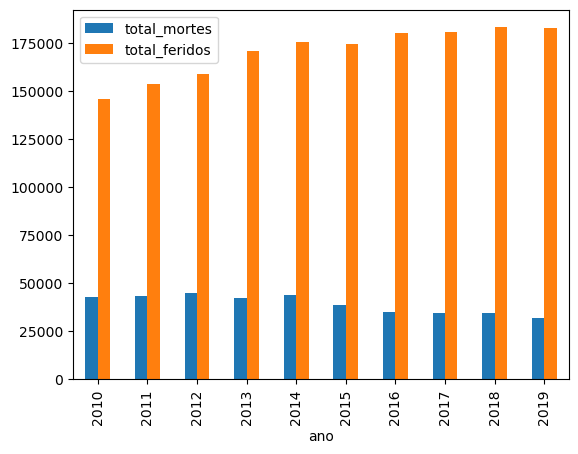

In [18]:
df_mortes_feridos_ano = df_acidentes[['ano','total_mortes', 'total_feridos']].groupby(by=['ano']).sum().reset_index()
display(df_mortes_feridos_ano)
df_mortes_feridos_ano.plot.bar(x='ano', y=['total_mortes', 'total_feridos'])


**Nota-se que o número de mortes vai diminuindo gradativamente ao longo do tempo, enquanto o número de feridos vai aumentando.**

### Mortos por Tipos de acidentes

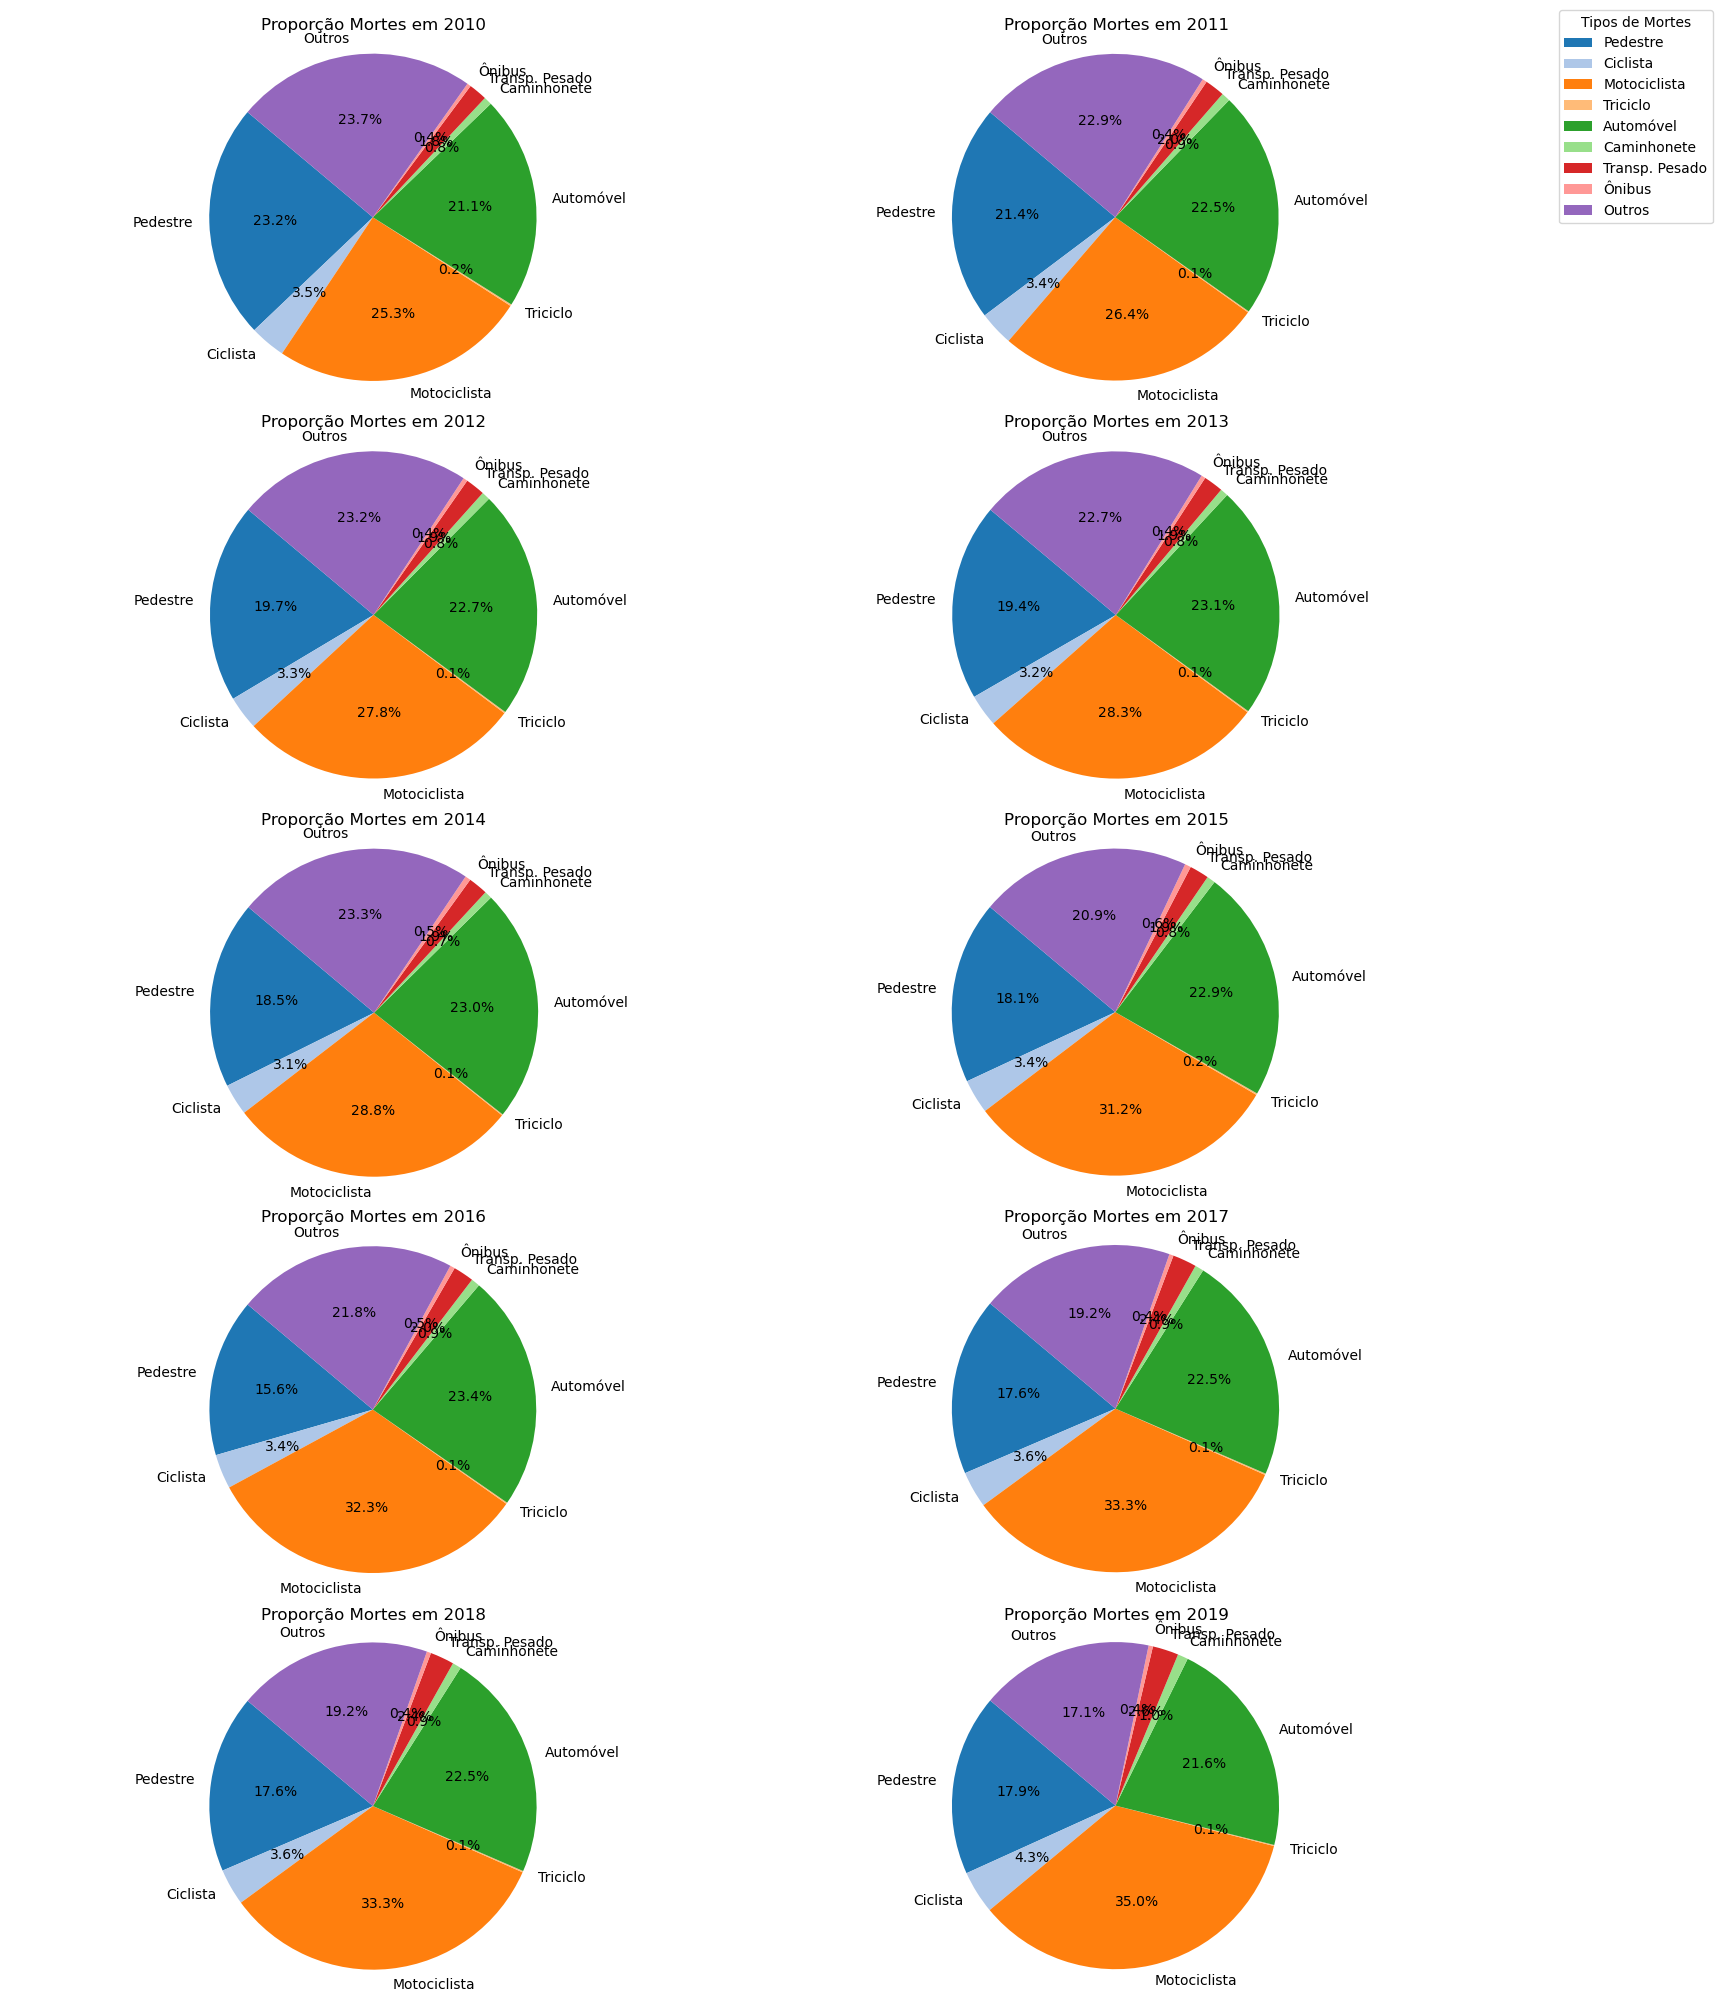

In [19]:
mortes_tipo_abreviadas = {
    'Pedestre_mortes': 'Pedestre',
    'Ciclista_mortes': 'Ciclista',
    'Motociclista_mortes': 'Motociclista',
    'Ocup_triciclo_motor_mortes': 'Triciclo',
    'Ocup_automovel_mortes': 'Automóvel',
    'Ocup_caminhonete_mortes': 'Caminhonete',
    'Ocup_veic_transp_pesado_mortes': 'Transp. Pesado',
    'Ocup_onibus_mortes': 'Ônibus',
    'Outros_mortes': 'Outros'
}
# Criando um grid de gráficos
fig, axs = plt.subplots(nrows=len(df_acidentes['ano'].unique())//2 + len(df_acidentes['ano'].unique())%2, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, ano in enumerate(df_acidentes['ano'].unique()):
    somas_mortes = df_acidentes[df_acidentes['ano'] == ano][['Pedestre_mortes','Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes','Ocup_automovel_mortes', 'Ocup_caminhonete_mortes',
                    'Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes',]].sum()

    labels_abreviados = [mortes_tipo_abreviadas[col] for col in somas_mortes.index]


    axs[i].pie(somas_mortes, labels=labels_abreviados, colors=plt.get_cmap('tab20').colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Proporção Mortes em {ano}')
    axs[i].axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo

fig.legend(labels_abreviados, loc='upper right', bbox_to_anchor=(1.15, 1), title="Tipos de Mortes")

# Removendo gráficos vazios (caso o número de anos seja ímpar)
if len(df_acidentes['ano'].unique()) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


É possível notar alguns detalhes acima:

- A proporção de mortes total por automóvel + moto + pedestres é cerca de 70% do total de mortes. 

- A Proporção de mortes por moto vem aumentando consideravelmente ao longo dos anos, saindo de 27,8% em 2010 e chegando a 35% em 2019, enquanto a proporção de mortes de pedestres vem caindo, saindo de 23,2% em 2010 e chegando a 17,9% em 2019.


### Mortos por Tipos de acidentes

In [20]:
df_acidentes.columns

Index(['Código IBGE', 'ano', 'Região', 'Município', 'Pedestre_mortes',
       'Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',
       'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes',
       'Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes',
       'Populacao', 'total_mortes', 'taxa_mun_mortes',
       'taxa_mun_pedestre_mortes', 'taxa_mun_ciclista_mortes',
       'taxa_mun_motociclista_mortes', 'taxa_mun_automovel_mortes',
       'taxa_mun_veiculo_pesado_mortes', 'taxa_mun_onibus_mortes',
       'taxa_mun_outros_mortes', 'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_AMAZONIA',
       'mun_FRONTEIRA', 'mun_CAPITAL', 'mun_LATITUDE', 'mun_LONGITUDE',
       'mun_ALTITUDE', 'mun_AREA', 'mun_codigo_adotado', 'uf_SIGLA_UF',
       'uf_CODIGO_UF', 'uf_NOME_UF', 'uf_REGIAO', 'mun_coordenadas',
       'Pedestre_feridos', 'Ciclista_feridos', 'Motociclista_feridos',
       'Ocup_triciclo_motor_feridos', 'Ocup_automovel_feridos',
       'Ocup_caminhonete_ferid

In [21]:
df_acidentes[df_acidentes['ano'] == 2010][['total_feridos']].sum()

total_feridos    146066.0
dtype: float64

2010
somas_feridos Pedestre_feridos                   39269
Ciclista_feridos                    9325
Motociclista_feridos               69609
Ocup_triciclo_motor_feridos          360
Ocup_automovel_feridos             14647
Ocup_caminhonete_feridos             316
Ocup_veic_transp_pesado_feridos      724
Ocup_onibus_feridos                  359
Outros_feridos                     11457
dtype: int64
2011
somas_feridos Pedestre_feridos                   37577
Ciclista_feridos                    9291
Motociclista_feridos               77172
Ocup_triciclo_motor_feridos          423
Ocup_automovel_feridos             15588
Ocup_caminhonete_feridos             304
Ocup_veic_transp_pesado_feridos      738
Ocup_onibus_feridos                  423
Outros_feridos                     12116
dtype: int64
2012
somas_feridos Pedestre_feridos                   40426
Ciclista_feridos                    8831
Motociclista_feridos               80833
Ocup_triciclo_motor_feridos          622
Ocup_automovel_

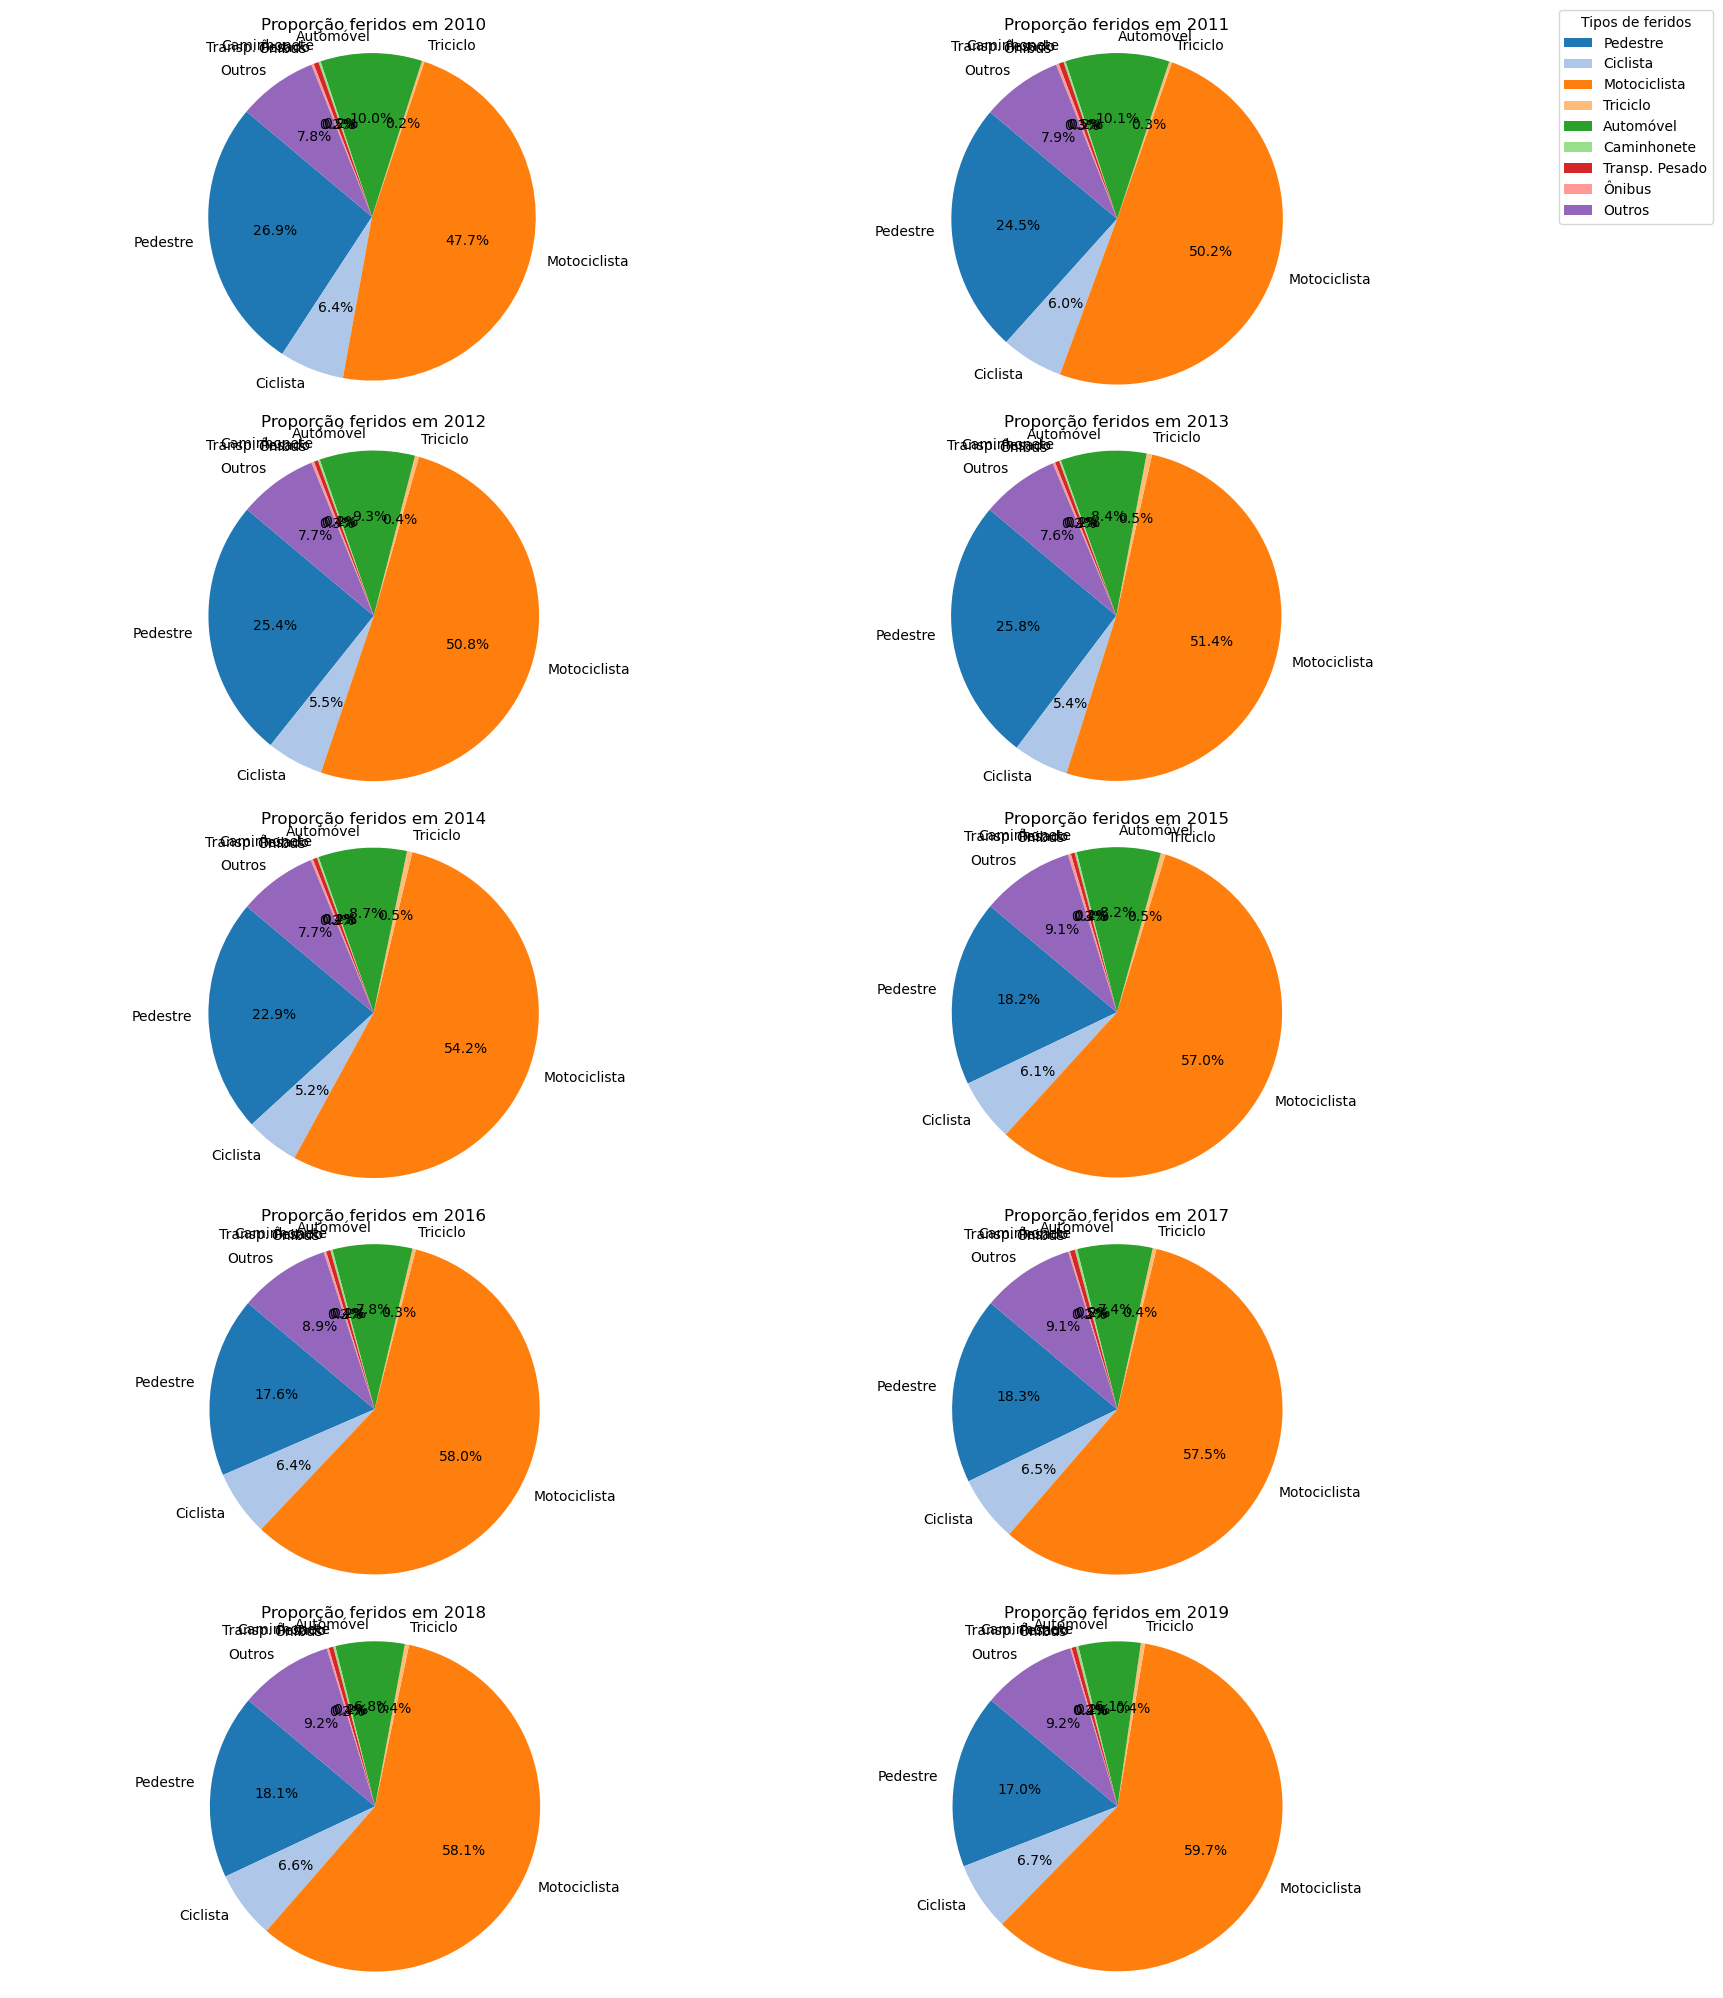

In [22]:
feridos_tipo_abreviadas = {
    'Pedestre_feridos': 'Pedestre',
    'Ciclista_feridos': 'Ciclista',
    'Motociclista_feridos': 'Motociclista',
    'Ocup_triciclo_motor_feridos': 'Triciclo',
    'Ocup_automovel_feridos': 'Automóvel',
    'Ocup_caminhonete_feridos': 'Caminhonete',
    'Ocup_veic_transp_pesado_feridos': 'Transp. Pesado',
    'Ocup_onibus_feridos': 'Ônibus',
    'Outros_feridos': 'Outros'
}
# Criando um grid de gráficos
fig, axs = plt.subplots(nrows=len(df_acidentes['ano'].unique())//2 + len(df_acidentes['ano'].unique())%2, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, ano in enumerate(df_acidentes['ano'].unique()):
    print(ano)
    somas_feridos = df_acidentes[df_acidentes['ano'] == ano][['Pedestre_feridos','Ciclista_feridos', 'Motociclista_feridos', 'Ocup_triciclo_motor_feridos','Ocup_automovel_feridos', 'Ocup_caminhonete_feridos',
                    'Ocup_veic_transp_pesado_feridos', 'Ocup_onibus_feridos', 'Outros_feridos']].sum()

    print('somas_feridos', somas_feridos)

    labels_abreviados = [feridos_tipo_abreviadas[col] for col in somas_feridos.index]


    axs[i].pie(somas_feridos, labels=labels_abreviados, colors=plt.get_cmap('tab20').colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Proporção feridos em {ano}')
    axs[i].axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo

fig.legend(labels_abreviados, loc='upper right', bbox_to_anchor=(1.15, 1), title="Tipos de feridos")

# Removendo gráficos vazios (caso o número de anos seja ímpar)
if len(df_acidentes['ano'].unique()) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

É possível notar que:

- A proporção de feridos total apenas por moto representa cerca de 50% das mortes, e moto + pedestre cerca de 75%. 

- A proporção de feridos por moto vem aumentando, saindo de 47,7% em 2010 e chegando a 59,7% em 2019. para pedestre saiu de 26,9% em 2010 e chegou a 17% em 2019


### População por Município

In [23]:
df_populacao_munic = df_acidentes[['ano','uf_REGIAO', 'Populacao', 'uf_SIGLA_UF', 'Município']].groupby(['ano','uf_REGIAO', 'uf_SIGLA_UF', 'Município']).max().reset_index()
df_populacao_munic

,ano,uf_REGIAO,uf_SIGLA_UF,Município,Populacao
0,2010,Centro-Oeste,DF,Brasília,2570160
1,2010,Centro-Oeste,GO,Abadia de Goiás,6876
2,2010,Centro-Oeste,GO,Abadiânia,15757
3,2010,Centro-Oeste,GO,Acreúna,20279
4,2010,Centro-Oeste,GO,Adelândia,2477
...,...,...,...,...,...
55695,2019,Sul,SC,Zortéa,3363
55696,2019,Sul,SC,Água Doce,7145
55697,2019,Sul,SC,Águas Frias,2366
55698,2019,Sul,SC,Águas Mornas,6469


### Mortos e feridos em % por região

In [24]:
df_populacao_regiao = df_populacao_munic.groupby(['ano', 'uf_REGIAO'])['Populacao'].sum().reset_index()
df_populacao_regiao.head()

,ano,uf_REGIAO,Populacao
0,2010,Centro-Oeste,14058094
1,2010,Nordeste,53081950
2,2010,Norte,15864454
3,2010,Sudeste,80364410
4,2010,Sul,27386891


In [25]:
df_mortes_feridos_regiao = df_acidentes.groupby(['ano', 'uf_REGIAO'])[['total_mortes', 'total_feridos']].sum().reset_index()
df_mortes_feridos_regiao = pd.merge(df_mortes_feridos_regiao, df_populacao_regiao, on=['ano', 'uf_REGIAO'])
df_mortes_feridos_regiao.head()

,ano,uf_REGIAO,total_mortes,total_feridos,Populacao
0,2010,Centro-Oeste,4479.0,14197.0,14058094
1,2010,Nordeste,11885.0,39794.0,53081950
2,2010,Norte,3370.0,8249.0,15864454
3,2010,Sudeste,15571.0,65752.0,80364410
4,2010,Sul,7535.0,18074.0,27386891


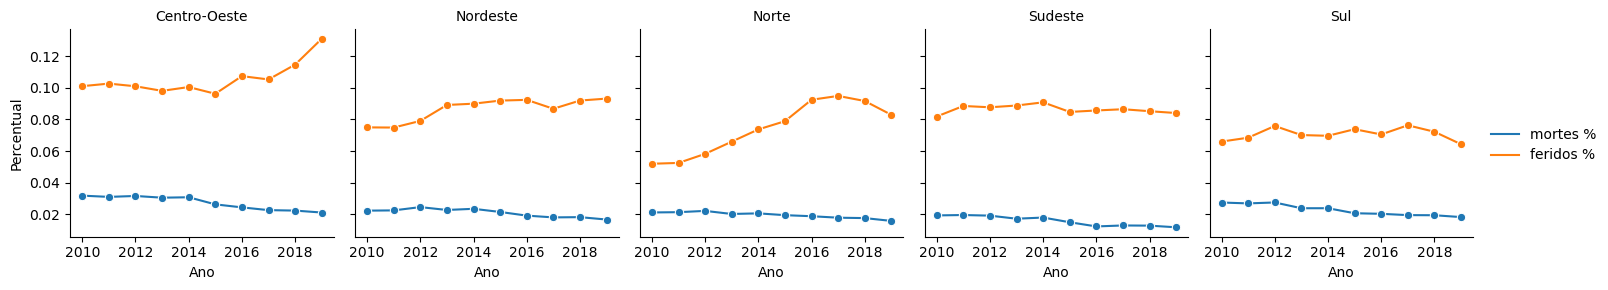

In [26]:
# Mesclando os dataframes para cálculo dos %
df_mortes_feridos_regiao['mortes %'] = (df_mortes_feridos_regiao['total_mortes'] / df_mortes_feridos_regiao['Populacao']) * 100
df_mortes_feridos_regiao['feridos %'] = (df_mortes_feridos_regiao['total_feridos'] / df_mortes_feridos_regiao['Populacao']) * 100

g = sns.FacetGrid(\
    #mortes e feridos vira valor em uma coluna
    pd.melt(df_mortes_feridos_regiao, id_vars=['ano', 'uf_REGIAO'], value_vars=['mortes %', 'feridos %'], var_name='Tipo_acidente', value_name='Percentual')\
    , col='uf_REGIAO')

g.map_dataframe(sns.lineplot, x='ano', y='Percentual', hue='Tipo_acidente', marker='o')
g.set_axis_labels("Ano", "Percentual")
g.add_legend()
g.set_titles("{col_name}")
plt.show()


É possível ver acima que:

- A taxa de mortes vai decaindo gradativamente em todas as regiões

- A taxa de feridos no Sul e Sudeste se mantém estável, enquanto no Norte, Nordeste e Centro Oeste vai aumentando

### Top 5 municipios com mais mortos

,ano,Município,total_mortes,Ranking
0,2019,São Paulo,762.0,1
1,2019,Recife,414.0,2
2,2019,Rio de Janeiro,385.0,3
3,2019,Goiânia,361.0,4
4,2019,Brasília,338.0,5
5,2018,Rio de Janeiro,628.0,1
6,2018,Goiânia,398.0,2


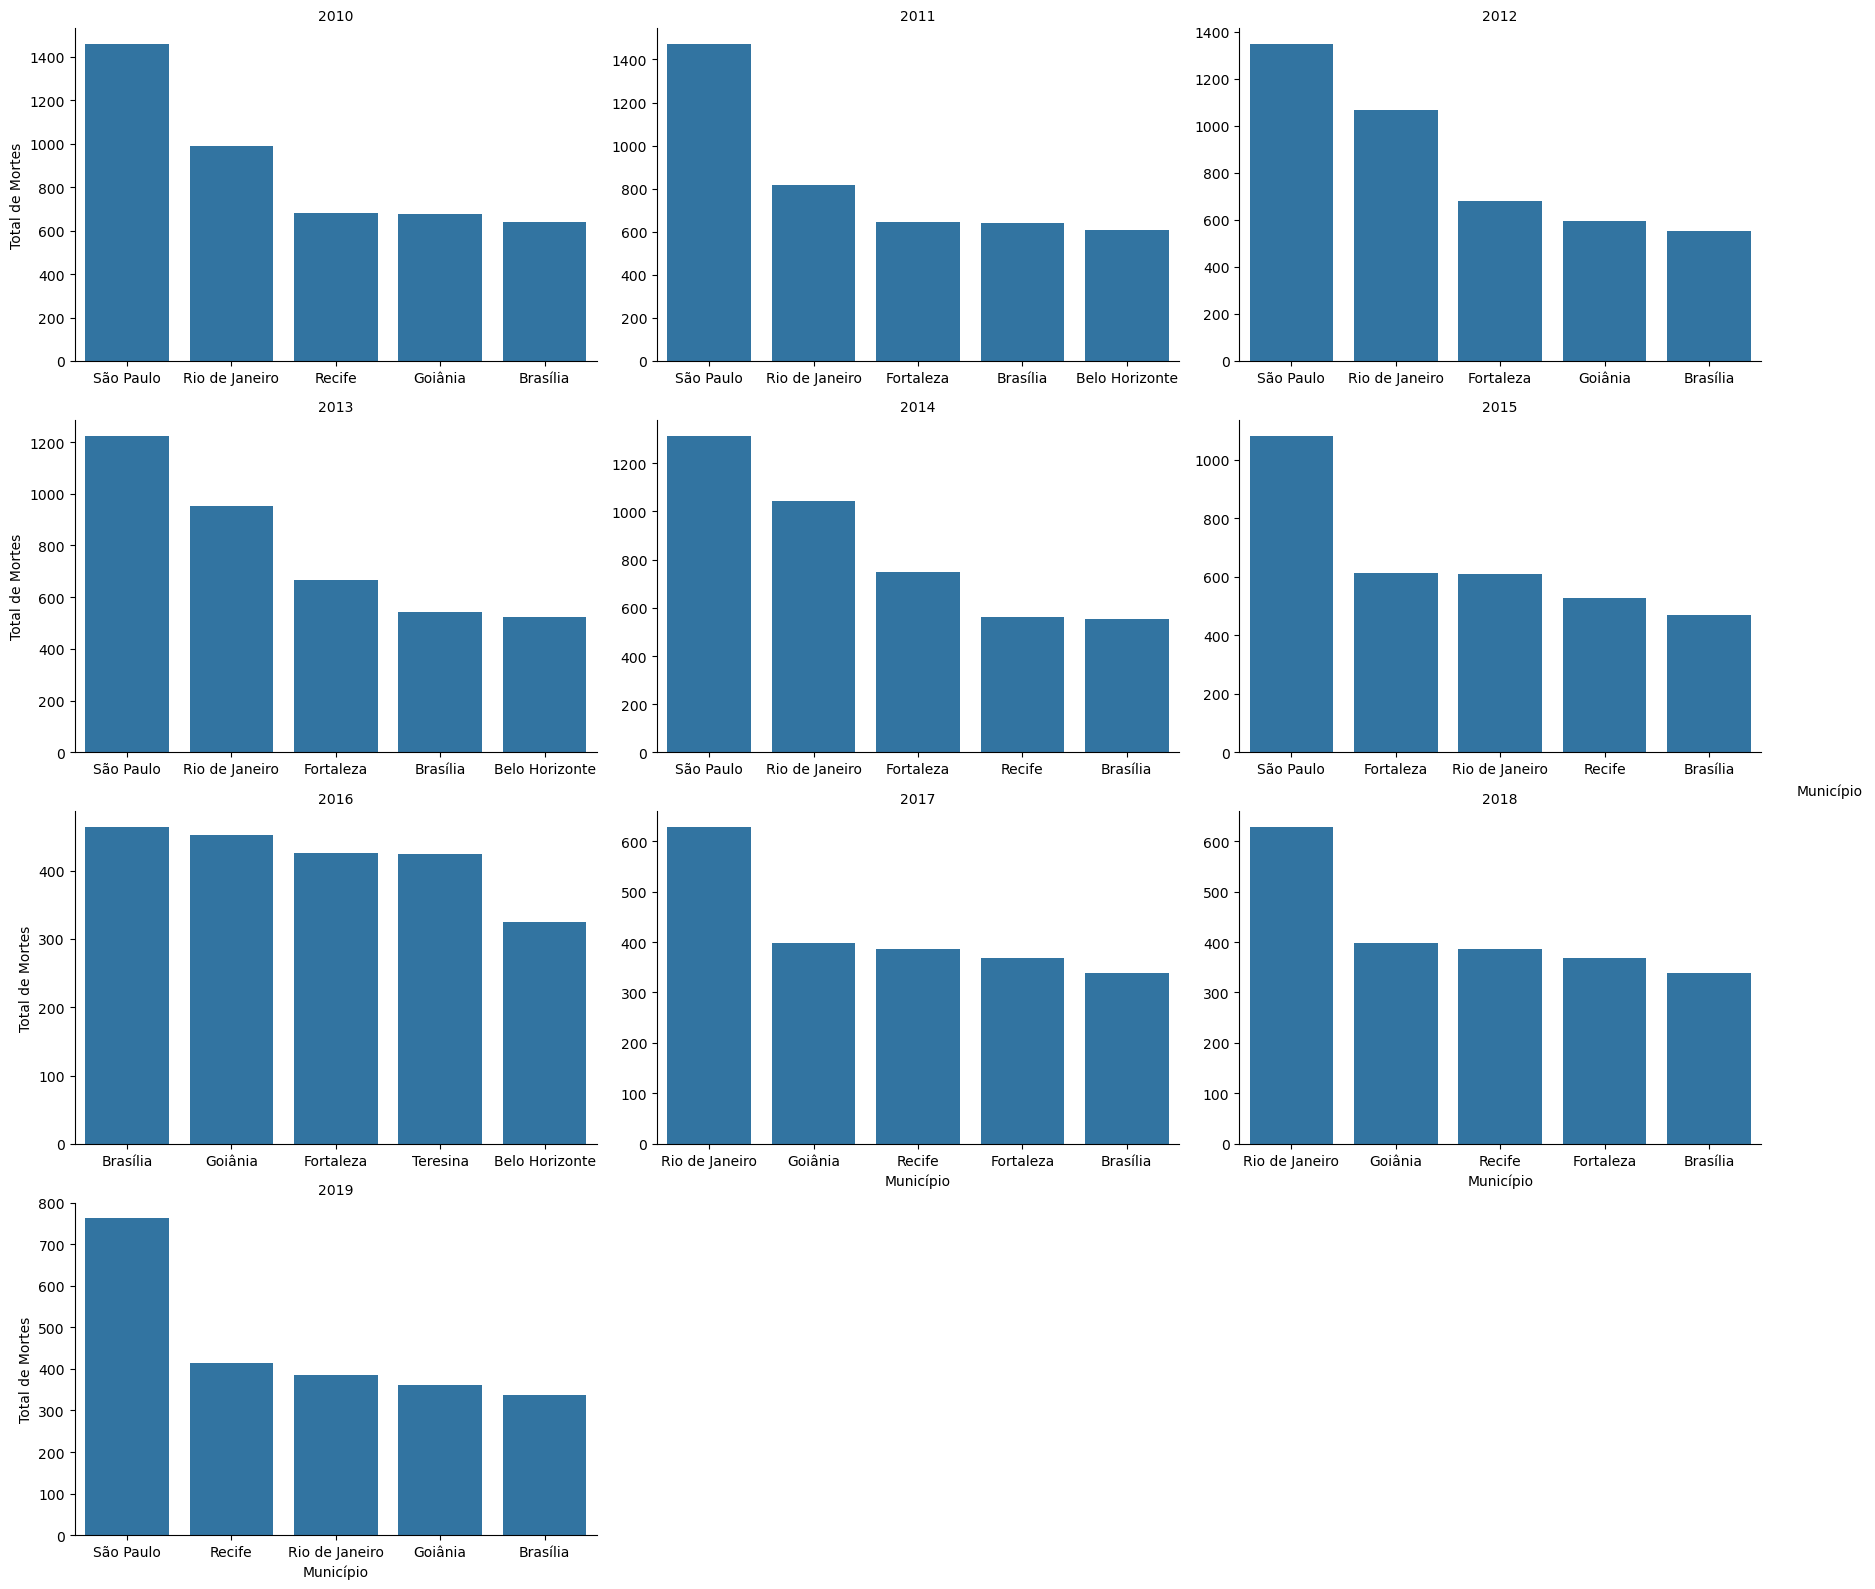

In [27]:
df_mortes_munic = df_acidentes[['ano','Município','total_mortes']].sort_values(by=['ano', 'total_mortes'], ascending=[False, False]).groupby('ano').head().reset_index(drop=True)
df_mortes_munic['Ranking'] = df_mortes_munic.groupby('ano')['total_mortes'].rank(method='first', ascending=False).astype(int)
display(df_mortes_munic.head(7))

g = sns.FacetGrid(df_mortes_munic, col='ano', col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='Município', y='total_mortes')
g.set_axis_labels("Município", "Total de Mortes")
g.add_legend(title='Município')
g.set_titles("{col_name}")
g.tight_layout()
plt.show()


Do gráfico acima, podemos destacar:

- São Paulo fica em 1° lugar no número de mortos por município de 2010 a 2015 e em 2019, porém de 2016 a 2018 não fica nem no top5.

- A queda do número de mortes em SP coincide com a diminuição temporária dos limites de velocidade nas marginais e com aumento da fiscalização da Lei Seca, o que pode indicar possíveis correlações. Notícias que relatam essa relação:
    - https://g1.globo.com/sao-paulo/noticia/mortes-nas-marginais-cairam-57-em-2016-segundo-dados-da-cet.ghtml
    - https://www.saopaulo.sp.gov.br/spnoticias/transito-de-sp-tem-reducao-de-56-no-numero-de-mortes-em-2016/#:~:text=De%20acordo%20com%20dados%20do,total%2C%20339%20vidas%20foram%20preservadas
    

### Top 5 municipios com mais feridos

,ano,Município,total_feridos,Ranking
0,2019,São Paulo,9126.0,1
1,2019,Fortaleza,7596.0,2
2,2019,Goiânia,7436.0,3
3,2019,Belo Horizonte,6161.0,4
4,2019,Teresina,5111.0,5
5,2018,São Paulo,8686.0,1
6,2018,Fortaleza,6905.0,2


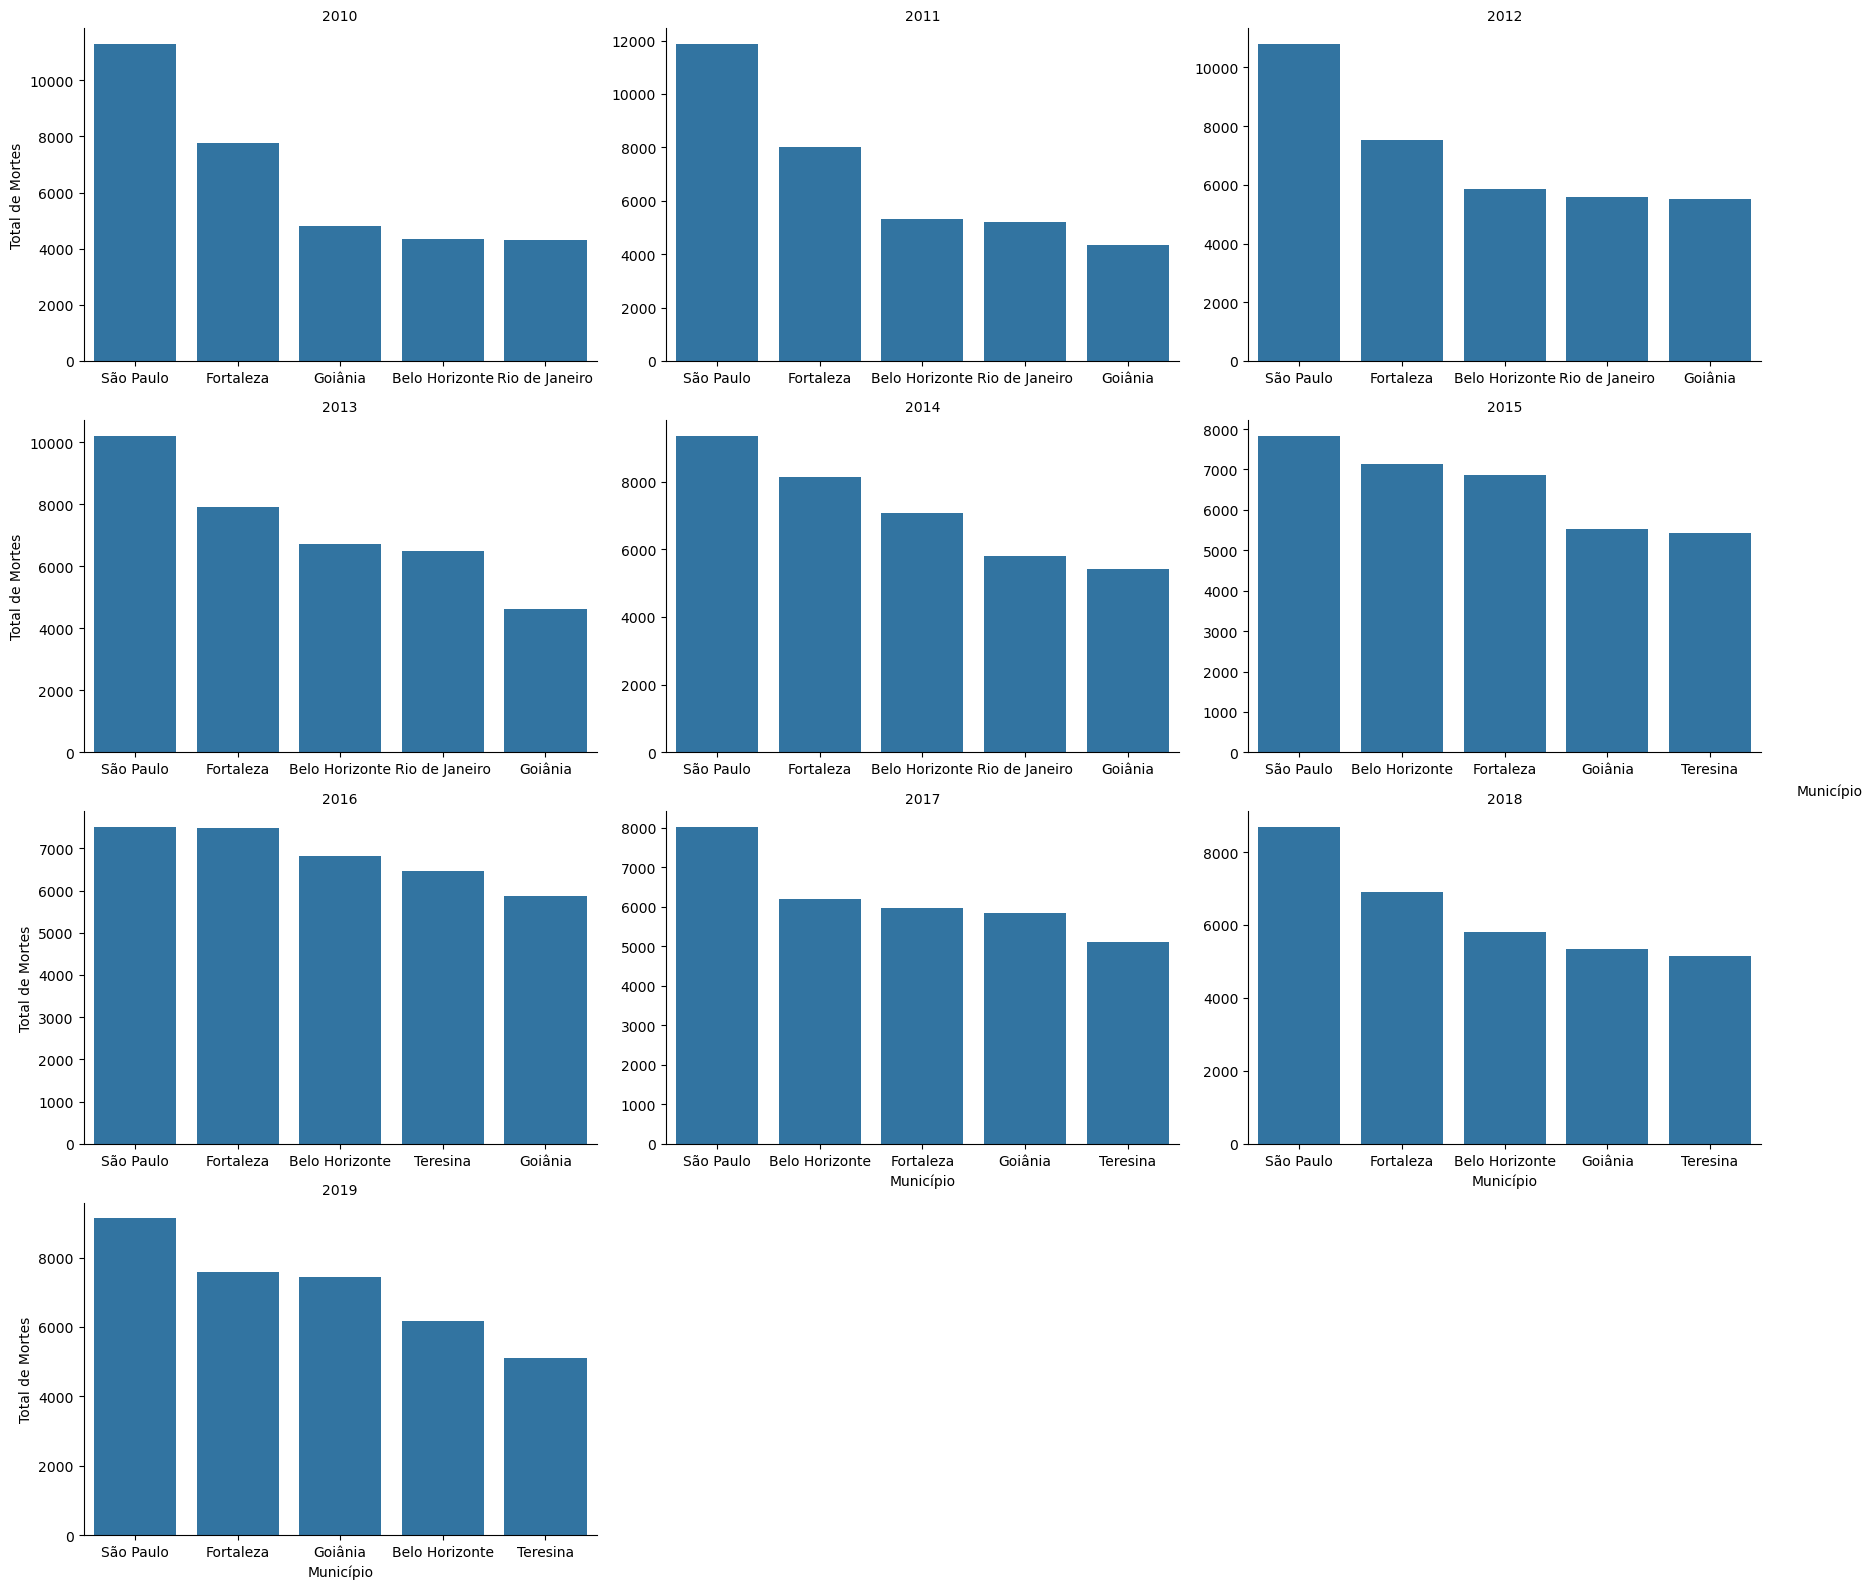

In [28]:
df_feridos_munic = df_acidentes[['ano','Município','total_feridos']].sort_values(by=['ano', 'total_feridos'], ascending=[False, False]).groupby('ano').head().reset_index(drop=True)
df_feridos_munic['Ranking'] = df_feridos_munic.groupby('ano')['total_feridos'].rank(method='first', ascending=False).astype(int)
display(df_feridos_munic.head(7))

g = sns.FacetGrid(df_feridos_munic, col='ano', col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='Município', y='total_feridos')
g.set_axis_labels("Município", "Total de Mortes")
g.add_legend(title='Município')
g.set_titles("{col_name}")
g.tight_layout()
plt.show()


Destaca-se que SP está em 1° lugar em todos os anos

In [29]:
df_acidentes[['Populacao', *df_acidentes.columns]]

,Populacao,Código IBGE,ano,Região,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,...,Outros_feridos,total_feridos,taxa_mun_feridos,taxa_mun_pedestre_feridos,taxa_mun_ciclista_feridos,taxa_mun_motociclista_feridos,taxa_mun_automovel_feridos,taxa_mun_veiculo_pesado_feridos,taxa_mun_onibus_feridos,taxa_mun_outros_feridos
0,24392,1100015,2010,N,Alta Floresta D'Oeste,2,0,5,0,0,...,0,13.0,53.296200,0.000000,0.000000,53.296200,0.000000,0.000000,0.000000,0.000000
1,90353,1100023,2010,N,Ariquemes,0,1,2,0,0,...,3,43.0,47.591100,0.000000,1.106800,40.950500,2.213500,0.000000,0.000000,3.320300
2,6313,1100031,2010,N,Cabixi,0,0,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,78574,1100049,2010,N,Cacoal,2,1,17,0,4,...,1,57.0,72.543100,63.634300,1.272700,6.363400,0.000000,0.000000,0.000000,1.272700
4,17029,1100056,2010,N,Cerejeiras,3,0,1,0,0,...,0,1.0,5.872300,0.000000,5.872300,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55695,13863,5222005,2019,CO,Vianópolis,1,0,1,0,0,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55696,8743,5222054,2019,CO,Vicentinópolis,0,0,0,0,2,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55697,6171,5222203,2019,CO,Vila Boa,0,0,1,0,6,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55698,5821,5222302,2019,CO,Vila Propício,0,0,0,0,1,...,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
df_acidentes[['ano','uf_REGIAO', 'Populacao', 'uf_SIGLA_UF', 'Município']].sort_values(by='Município')#.groupby(['uf_REGIAO', 'uf_SIGLA_UF', 'Município']).sum().reset_index()

,ano,uf_REGIAO,Populacao,uf_SIGLA_UF,Município
55453,2019,Centro-Oeste,8773,GO,Abadia de Goiás
16463,2012,Centro-Oeste,7164,GO,Abadia de Goiás
38743,2016,Centro-Oeste,8053,GO,Abadia de Goiás
22033,2013,Centro-Oeste,7567,GO,Abadia de Goiás
5323,2010,Centro-Oeste,6876,GO,Abadia de Goiás
...,...,...,...,...,...
3648,2010,Sudeste,2673,SP,Óleo
48208,2018,Sudeste,2522,SP,Óleo
25928,2014,Sudeste,2652,SP,Óleo
37068,2016,Sudeste,2605,SP,Óleo


## Base Empreendimentos

In [31]:
df_populacao_munic2 = df_empreend[['ano','uf_REGIAO', 'Populacao', 'uf_SIGLA_UF', 'Município']].groupby(['ano','uf_REGIAO', 'uf_SIGLA_UF', 'Município']).max().reset_index()
df_populacao_munic2

,ano,uf_REGIAO,uf_SIGLA_UF,Município,Populacao
0,1996.0,Centro-Oeste,MS,Angélica,8215.0
1,1996.0,Centro-Oeste,MS,Aquidauana,40394.0
2,1996.0,Centro-Oeste,MS,Brasilândia,10595.0
3,1996.0,Centro-Oeste,MS,Campo Grande,600069.0
4,1996.0,Centro-Oeste,MS,Coronel Sapucaia,14308.0
...,...,...,...,...,...
20221,2021.0,Nordeste,PI,Paulistana,20583.0
20222,2021.0,Nordeste,PI,Queimada Nova,9041.0
20223,2021.0,Sudeste,MG,Vespasiano,131849.0
20224,2021.0,Sudeste,SP,Itu,177150.0


### Quantidades por tipos de programas ao longo dos anos

In [32]:
print('programas:',df_empreend.programa.unique())

df_empreend.pivot_table(index='ano', columns='programa', aggfunc='size', fill_value=0)

programas: ['PAC FIN' 'PAC OGU' 'AVANÇAR PÚBLICO' 'EMENDAS' 'PRÓ COMUNIDADE'
 'SETOR PRIVADO' nan]


programa,AVANÇAR PÚBLICO,EMENDAS,PAC FIN,PAC OGU,PRÓ COMUNIDADE,SETOR PRIVADO
ano,,,,,,
1996.0,0,70,0,0,0,0
1997.0,0,389,0,0,0,0
1998.0,0,776,0,0,0,0
1999.0,0,470,0,0,0,0
2000.0,0,481,0,0,4,0
2001.0,0,1200,0,0,1,0
2002.0,0,1899,0,0,1,0
2003.0,0,775,0,0,0,0
2004.0,0,855,0,0,0,0


### Valor de investimento por Estado

In [33]:
df_agrupado_estado = df_empreend.groupby(['ano','uf_SIGLA_UF'])['vlr_investimento'].sum().sort_values(ascending=False).reset_index()
df_agrupado_estado

,ano,uf_SIGLA_UF,vlr_investimento
0,2014.0,SP,2.153194e+10
1,2012.0,SP,4.905003e+09
2,2013.0,BA,4.671763e+09
3,2013.0,SP,4.083182e+09
4,2013.0,RJ,3.008309e+09
...,...,...,...
699,1996.0,SP,1.379700e+05
700,1996.0,SC,1.314280e+05
701,1999.0,CE,1.275840e+05
702,1997.0,AC,1.101628e+05


,vlr_investimento
ano,
1996,0.137970
1997,4.392103
1998,7.467830
1999,4.565027
2000,6.022925
2001,25.528002
2002,37.457117
2003,22.031468
2004,96.550867


Text(0.5, 1.0, 'Investimento em SP em milhões de Reais')

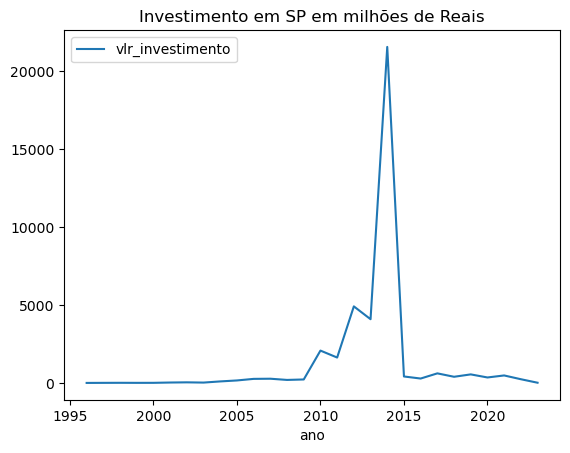

In [34]:
df_investimento_SP = df_agrupado_estado[df_agrupado_estado['uf_SIGLA_UF'] == 'SP'][['ano','vlr_investimento']].sort_values('ano').reset_index(drop=True)
df_investimento_SP['ano'] = df_investimento_SP['ano'].astype(int)
df_investimento_SP.set_index('ano', inplace=True)
df_investimento_SP = df_investimento_SP / 1e6
display(df_investimento_SP)
(df_investimento_SP).plot().set_title("Investimento em SP em milhões de Reais")


Destaca-se que os investimentos em São Paulo foram aumentando consideravelmente de 1996 a 2014. 

Até 2009 não havia tido nenhum ano com investimento superior a R$ 300 milhões, entretanto em 2010 houve um salto nos investimentospara R$ 2,072 bilhões e em 2014 para R$ 21,531 bilhões. Por outro lado, após 2014, não teve nenhum outro ano que os investimentos superaram a casa dos R$ 650 milhões

In [35]:
df_investimento_not_SP = df_agrupado_estado[['uf_SIGLA_UF','ano','vlr_investimento']].sort_values(['ano', 'uf_SIGLA_UF']).reset_index(drop=True)
df_investimento_not_SP['ano'] = df_investimento_not_SP['ano'].astype(int)
df_investimento_not_SP

,uf_SIGLA_UF,ano,vlr_investimento
0,AC,1996,2994708.06
1,AL,1996,890000.00
2,MG,1996,4631645.82
3,MS,1996,2994794.50
4,PA,1996,1563193.40
...,...,...,...
699,RJ,2023,1000000.00
700,RN,2023,1057858.00
701,SC,2023,3353000.00
702,SP,2023,12608245.49


### Duração das Obras

<AxesSubplot:xlabel='Duracao_obra', ylabel='Count'>

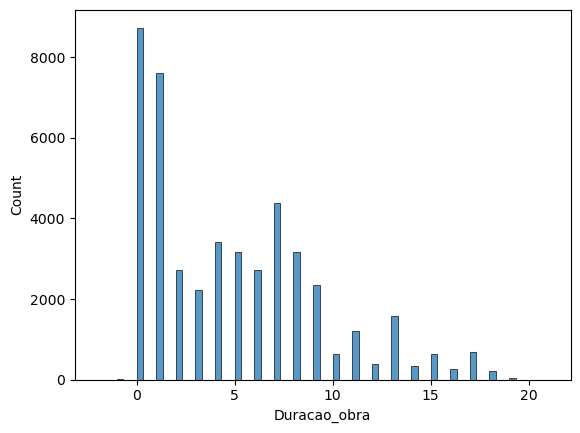

In [36]:
df_empreend['Duracao_obra'] = (df_empreend['ano_fim_obra'] -	df_empreend['ano_inicio_obra'])
sns.histplot(df_empreend['Duracao_obra'])

### Origem da obra

In [37]:
df_empreend.origem.unique()

array(['PAC_MCID', 'NPAC_DBGESTORES', 'NPAC_FGTS'], dtype=object)

NPAC_DBGESTORES    69038
PAC_MCID            2080
NPAC_FGTS            130
Name: origem, dtype: int64

NPAC_DBGESTORES    96.898159
PAC_MCID            2.919380
NPAC_FGTS           0.182461
Name: origem, dtype: float64

<AxesSubplot:>

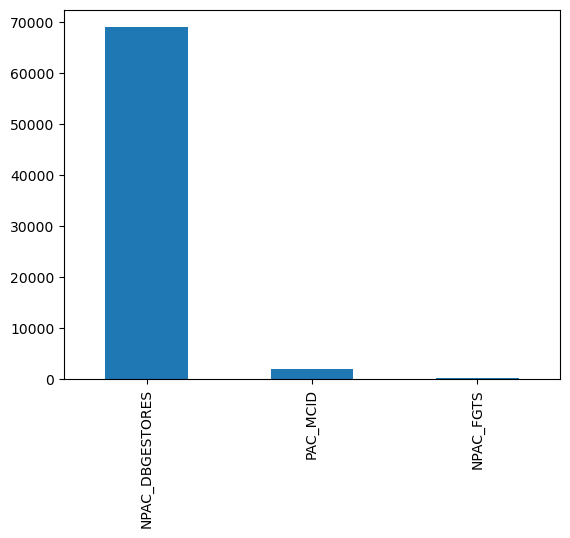

In [38]:
display(df_empreend.origem.value_counts())
display(df_empreend.origem.value_counts() / len(df_empreend.origem) * 100)
df_empreend.origem.value_counts().plot(kind='bar')

Quase todas as linhas, fazem parte da origem *NPAC_DBGESTORES*

### Empreendimentos - analisando o tipo de conteúdo

In [39]:
df_empreend.empreendimento.unique().tolist()[:40]

["IMPLANTACAO DO TRANSPORTE RAPIDO POR ONIBUS NO CORREDOR DA  'V CAXANGA ATE O TERMINAL DE CAMARAGIBE",
 'CONSTRUCAO DO TERMINAL DE COSME E DAMIAO',
 'IMPLANTA«ŸO DO TRANSPORTE RAPIDO POR ONIBUS NO CORREDOR     NORTE SUL NO TRECHO IGARASSU/JOANA BEZERRA/CENTRO DO RECIFE',
 'NAN',
 'PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS, COM INSERCAO DEDRENAGEM, GUIAS E SARJ. E CALCAMENTOS NO VERDE PARQUE',
 'PAVIMENTACAO E QUALIFICACAO DE VIAS URBANAS COM DRENAGEM,   GUIAS, SARJETAS E CALCAMENTO NO JARDIM DAS OLIVEIRAS',
 'PAVIMENTACAO ASFALTICA EM DIVERSAS RUAS E BAIRROS DA CIDADE',
 'PRO. TRANSPORTE - PAVIMENTACAO - SAO JOSE - LOT. BENJAMIN   PZO.1ŒDESEMBOLSO: JAN/2013 - PZO.ULTIMO DESEMBOLSO: MAR/2016',
 'SIM - SISTEMA INTEGRADO DE MONITORAMENTO.CONJUNTO DE INTER  VENCOES PARA CONTROLE DE TRAFEGO EM AREA',
 'IMPLANTACO DO CORREDOR AVENIDA TRONCO/CRUZEIRO DO SUL',
 'IMPLANTACAO DO CORREDOR PADRE CACIQUE/AVENIDA BEIRA RIO     (AV. EDVALDO PEREIRA PAIVA)',
 'PRO. TRANSPORTE - PAV. - NAVEGANTES I 

Veja que é uma variável do tipo texto, o que representa um desafio para tratar essas variáveis e relacioná-las com mortos e feridos.

#### Empreendimentos duplicados

In [40]:
# verifica empreendimentos que estão duplicados
df_empreend[df_empreend[['ano','empreendimento','Código IBGE']].duplicated()].empreendimento.unique().shape

(2226,)

#### olhando valores de *cod_operacao*

In [41]:
df_empreend.cod_operacao#.unique().shape

0        319910.0
1        319912.0
2        319914.0
3        354485.0
4        345051.0
           ...   
71243    603795.0
71244    603796.0
71245    603794.0
71246    603798.0
71247    603847.0
Name: cod_operacao, Length: 71248, dtype: float64

## Combinando bases empreendimentos com acidentes

In [42]:
# colunas em comum entre a base de acidentes e a de empreendimentos
colunas_comum = list(set(df_acidentes.columns).intersection(set(df_empreend.columns)))
print(colunas_comum)

['uf_NOME_UF', 'mun_AMAZONIA', 'mun_CAPITAL', 'Populacao', 'uf_REGIAO', 'mun_ALTITUDE', 'uf_CODIGO_UF', 'ano', 'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_coordenadas', 'Região', 'uf_SIGLA_UF', 'mun_codigo_adotado', 'mun_LATITUDE', 'Código IBGE', 'mun_FRONTEIRA', 'Município', 'mun_AREA', 'mun_LONGITUDE']


In [43]:
print('tamanhos',len(df_acidentes), len(df_empreend))
df_merged = df_acidentes.merge(df_empreend, how='right', on=colunas_comum)
df_merged


tamanhos 55700 71248


,Código IBGE,ano,Região,Município,Pedestre_mortes,Ciclista_mortes,Motociclista_mortes,Ocup_triciclo_motor_mortes,Ocup_automovel_mortes,Ocup_caminhonete_mortes,...,vlr_ult_repasse_desbloqueado_num,vlr_ult_contrapartida_desbloqueado_num,vlr_ult_investimento_desbloqueado_num,ano_assinatura,ano_inicio_obra,ano_fim_obra,ano_ult_desembolso,ano_ult_desbloqueio,ano_ult_ref_bm,Duracao_obra
0,2611606.0,2011.0,NE,Recife,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,2011.0,2011.0,2021.0,2019.0,2019.0,NaN,10.0
1,2611606.0,2011.0,NE,Recife,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,2011.0,2011.0,2015.0,2014.0,2014.0,NaN,4.0
2,2611606.0,2011.0,NE,Recife,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,2011.0,2011.0,2022.0,2022.0,2022.0,NaN,11.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3502804.0,2012.0,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,2012.0,2012.0,2018.0,2015.0,2015.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71243,2927408.0,2021.0,NE,Salvador,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,2021.0,2021.0,2022.0,NaN,NaN,NaN,1.0
71244,2927408.0,2021.0,NE,Salvador,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,2021.0,2021.0,2022.0,NaN,NaN,NaN,1.0
71245,2927408.0,2021.0,NE,Salvador,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,2021.0,2021.0,2022.0,NaN,NaN,NaN,1.0
71246,2927408.0,2021.0,NE,Salvador,NaN,NaN,NaN,NaN,NaN,NaN,...,R$ 0,R$ 0,R$ 0,2021.0,2021.0,2022.0,NaN,NaN,NaN,1.0


## Algumas perguntas que surgiram quanto às bases, para procedermos com a análise

## A populacao de um mesmo municipio varia ao longo do tempo nos dados fornecidos?

In [44]:
df_agrupado = df_empreend.groupby('Código IBGE')['Populacao'].nunique()
linhas_diferentes = df_agrupado[df_agrupado > 1]
    
if len(linhas_diferentes) > 0:
    print("Existem linhas com o mesmo 'Código IBGE' que têm a coluna 'Populacao' diferente.")
else:
    print("Não existem linhas com o mesmo 'Código IBGE' que têm a coluna 'Populacao' diferente.")

Existem linhas com o mesmo 'Código IBGE' que têm a coluna 'Populacao' diferente.


#### Coluna 'ano' se refere ao ano do registro

In [45]:
df_agrupado = df_empreend.groupby(['Código IBGE', 'ano'])['Populacao'].nunique()
linhas_diferentes = df_agrupado[df_agrupado > 1]

if len(linhas_diferentes) > 0:
    print("Existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.")
else:
    print("Não existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.")


Não existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.


Ou seja, pegaram a populacao naquele ano. Então investimento per capita por exemplo preciso pegar por ano - claro que depois posso pegar uma média

In [46]:
df_agrupado = df_empreend.groupby(['Código IBGE', 'ano_inicio_obra'])['Populacao'].nunique()
linhas_diferentes = df_agrupado[df_agrupado > 1]

if len(linhas_diferentes) > 0:
    print("Existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.")
else:
    print("Não existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.")


Existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.


In [47]:
df_agrupado = df_empreend.groupby(['Código IBGE', 'ano_fim_obra'])['Populacao'].nunique()
linhas_diferentes = df_agrupado[df_agrupado > 1]

if len(linhas_diferentes) > 0:
    print("Existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.")
else:
    print("Não existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.")


Existem linhas com o mesmo 'Código IBGE' e 'ano' que têm a coluna 'Populacao' diferente.


## O que significa esse ano de registro? (coluna 'ano' na base df_empreend)

In [48]:
df_empreend[['ano', 'ano_inicio_obra', 'ano_fim_obra']]

,ano,ano_inicio_obra,ano_fim_obra
0,2011.0,2011.0,2021.0
1,2011.0,2011.0,2015.0
2,2011.0,2011.0,2022.0
3,NaN,NaN,NaN
4,2012.0,2012.0,2018.0
...,...,...,...
71243,2021.0,2021.0,2022.0
71244,2021.0,2021.0,2022.0
71245,2021.0,2021.0,2022.0
71246,2021.0,2021.0,2022.0


In [49]:
df_empreend['ano'].isna().sum()

11583

In [50]:
df_empreend['ano_inicio_obra'].isna().sum()

23369

In [51]:
df_sem_nulos = df_empreend.dropna(subset=['ano', 'ano_inicio_obra'])

linhas = df_sem_nulos[df_sem_nulos['ano'] > df_sem_nulos['ano_inicio_obra']]

print(linhas[['ano', 'ano_inicio_obra', 'ano_fim_obra']])

          ano  ano_inicio_obra  ano_fim_obra
417    2013.0           2012.0        2019.0
418    2012.0           2011.0        2023.0
430    2013.0           2012.0        2020.0
1260   2011.0           2008.0           NaN
41876  2013.0           2011.0        2015.0
65284  2020.0           2002.0        2023.0
67634  2021.0           2020.0           NaN
69072  2021.0           2020.0        2023.0


Ano de registro é quase sempre menor do que o ano de início de obra, com exceção de bem poucas linhas.

## Código IBGE define as outras colunas de município?

In [52]:
df_sem_nulos = df_empreend.dropna(subset=['Código IBGE', 'mun_LATITUDE'])

# Agrupar por 'Código IBGE' e verificar se o número de valores únicos na coluna 'mun_LATITUDE' é maior que 1 para qualquer grupo
df_agrupado = df_sem_nulos.groupby('Código IBGE')['mun_LATITUDE'].nunique()
linhas_diferentes = df_agrupado[df_agrupado > 1]

if len(linhas_diferentes) > 0:
    print("Existem linhas com o mesmo 'Código IBGE' que têm a coluna 'mun_LATITUDE' diferente.")
else:
    print("Todas as linhas com o mesmo 'Código IBGE' têm a coluna 'mun_LATITUDE' igual.")

Todas as linhas com o mesmo 'Código IBGE' têm a coluna 'mun_LATITUDE' igual.


Sim, ela define.

## Coluna mun_MUNNOMEX vs mun_MUNNOME

Comparar as duas colunas, verificando se são únicas por IBGE

In [53]:
colunas_preencher = ['mun_MUNNOMEX', 'mun_MUNNOME', 'mun_AMAZONIA', 'mun_FRONTEIRA', 'mun_CAPITAL', 'uf_CODIGO_UF', 'mun_LATITUDE', 'mun_LONGITUDE', 'mun_ALTITUDE', 'mun_AREA', 'mun_codigo_adotado', 'uf_NOME_UF', 'Região', 'uf_REGIAO', 'Município', 'mun_coordenadas']

for coluna in colunas_preencher:
    df_empreend[coluna] = df_empreend.groupby('Código IBGE')[coluna].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    
colunas = colunas_preencher + ['Código IBGE']

df_infos_municipios = df_empreend[colunas].drop_duplicates()
df_infos_municipios = df_infos_municipios[df_infos_municipios['Código IBGE'].notna()]

# Encontrar os códigos IBGE que aparecem mais de uma vez
codigos_duplicados = df_infos_municipios[df_infos_municipios.duplicated('Código IBGE', keep=False)]['Código IBGE'].unique()

codigo_exemplo = codigos_duplicados[0]

linhas_exemplo = df_infos_municipios[df_infos_municipios['Código IBGE'] == codigo_exemplo]

linhas_exemplo

,mun_MUNNOMEX,mun_MUNNOME,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF,Região,uf_REGIAO,Município,mun_coordenadas,Código IBGE
0,RECIFE,Recife,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881",2611606.0
1171,Recife,Recife,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881",2611606.0
31357,CALUMBI,Recife,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881",2611606.0
31367,JAQUEIRA,Recife,N,N,S,26.0,-8.054,-34.881,4.0,217494.0,261160.0,PERNAMBUCO,NE,Nordeste,Recife,"-8.054,-34.881",2611606.0


coluna mun_MUNNOMEX não 

In [54]:
codigo_exemplo = codigos_duplicados[1]

linhas_exemplo = df_infos_municipios[df_infos_municipios['Código IBGE'] == codigo_exemplo]

linhas_exemplo

,mun_MUNNOMEX,mun_MUNNOME,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF,Região,uf_REGIAO,Município,mun_coordenadas,Código IBGE
4,ARAÇATUBA,Araçatuba,N,N,N,35.0,-21.209,-50.433,390.0,1167311.0,350280.0,SAO PAULO,SE,Sudeste,Araçatuba,"-21.209,-50.433",3502804.0
2402,ARACATUBA,Araçatuba,N,N,N,35.0,-21.209,-50.433,390.0,1167311.0,350280.0,SAO PAULO,SE,Sudeste,Araçatuba,"-21.209,-50.433",3502804.0


In [55]:
codigo_exemplo = codigos_duplicados[2]

linhas_exemplo = df_infos_municipios[df_infos_municipios['Código IBGE'] == codigo_exemplo]

linhas_exemplo

,mun_MUNNOMEX,mun_MUNNOME,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF,Região,uf_REGIAO,Município,mun_coordenadas,Código IBGE
7,SÃO JOSÉ,São José,N,N,N,42.0,-27.615,-48.628,8.0,113171.0,421660.0,SANTA CATARINA,S,Sul,São José,"-27.615,-48.628",4216602.0
2165,SAO JOSE,São José,N,N,N,42.0,-27.615,-48.628,8.0,113171.0,421660.0,SANTA CATARINA,S,Sul,São José,"-27.615,-48.628",4216602.0


In [56]:
codigo_exemplo = codigos_duplicados[3]

linhas_exemplo = df_infos_municipios[df_infos_municipios['Código IBGE'] == codigo_exemplo]

linhas_exemplo

,mun_MUNNOMEX,mun_MUNNOME,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF,Região,uf_REGIAO,Município,mun_coordenadas,Código IBGE
8,CURITIBA,Curitiba,N,N,S,41.0,-25.428,-49.273,934.0,434967.0,410690.0,PARANA,S,Sul,Curitiba,"-25.428,-49.273",4106902.0
964,Curitiba,Curitiba,N,N,S,41.0,-25.428,-49.273,934.0,434967.0,410690.0,PARANA,S,Sul,Curitiba,"-25.428,-49.273",4106902.0


In [57]:
codigo_exemplo = codigos_duplicados[4]

linhas_exemplo = df_infos_municipios[df_infos_municipios['Código IBGE'] == codigo_exemplo]

linhas_exemplo

,mun_MUNNOMEX,mun_MUNNOME,mun_AMAZONIA,mun_FRONTEIRA,mun_CAPITAL,uf_CODIGO_UF,mun_LATITUDE,mun_LONGITUDE,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF,Região,uf_REGIAO,Município,mun_coordenadas,Código IBGE
11,PORTO ALEGRE,Porto Alegre,N,N,S,43.0,-30.033,-51.23,3.0,496827.0,431490.0,RIO GRANDE DO SUL,S,Sul,Porto Alegre,"-30.033,-51.23",4314902.0
965,Porto Alegre,Porto Alegre,N,N,S,43.0,-30.033,-51.23,3.0,496827.0,431490.0,RIO GRANDE DO SUL,S,Sul,Porto Alegre,"-30.033,-51.23",4314902.0


In [58]:
len(codigos_duplicados)

585

In [59]:
from unidecode import unidecode

df_empreend['mun_MUNNOMEX_transf'] = df_empreend['mun_MUNNOMEX'].apply(lambda x: unidecode(x).upper().replace("'", "") if pd.notnull(x) else x)

In [60]:
len(df_empreend['mun_MUNNOMEX'].unique())

5696

In [61]:
len(df_empreend['mun_MUNNOMEX_transf'].unique())

5130

In [62]:
colunas = ['mun_MUNNOMEX_transf', 'mun_MUNNOME', 'Código IBGE']

df_infos_municipios = df_empreend[colunas].drop_duplicates()
df_infos_municipios = df_infos_municipios[df_infos_municipios['Código IBGE'].notna()]

# Encontrar os códigos IBGE que aparecem mais de uma vez
codigos_duplicados = df_infos_municipios[df_infos_municipios.duplicated('Código IBGE', keep=False)]['Código IBGE'].unique()

codigo_exemplo = codigos_duplicados[0]

linhas_exemplo = df_infos_municipios[df_infos_municipios['Código IBGE'] == codigo_exemplo]

linhas_exemplo

,mun_MUNNOMEX_transf,mun_MUNNOME,Código IBGE
0,RECIFE,Recife,2611606.0
31357,CALUMBI,Recife,2611606.0
31367,JAQUEIRA,Recife,2611606.0


In [63]:
len(codigos_duplicados)

73

In [64]:
len(df_empreend['mun_MUNNOMEX'].unique())

5696

In [65]:
len(df_empreend['mun_MUNNOME'].unique())

4911

Ou seja, devemos confiar na coluna ‘mun_MUNNOME’ ao invés da ‘mun_MUNNOMEMEX’, porque essa última não é única por código IBGE.

## Linhas onde Código IBGE é igual a zero

In [66]:
df_empreend[df_empreend['Código IBGE'] == 0]

,cod_mdr,cod_operacao,cod_saci,cod_convenio_siafi,cod_ag_operador,origem,dsc_concedente,dsc_fonte,dsc_unidade,cod_proposta,...,mun_ALTITUDE,mun_AREA,mun_codigo_adotado,uf_NOME_UF,Região,uf_REGIAO,Município,mun_coordenadas,Duracao_obra,mun_MUNNOMEX_transf
4340,2-0065489,65489.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,NaN,NaN,NaN,NaN,N,Norte,NaN,NaN,NaN,PARAISO
6712,2-0104024,104024.0,NaN,416192.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NE,Nordeste,NaN,NaN,14.0,GOVERNADOR LOMANTO JUNIOR
9755,2-0146237,146237.0,NaN,463068.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,NaN,NaN,NaN,NaN,SE,Sudeste,NaN,NaN,13.0,GUARDA-MOR
20246,2-0234281,234281.0,NaN,604628.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,NaN,NaN,NaN,NaN,SE,Sudeste,NaN,NaN,7.0,GUARDA-MOR
23235,2-0252181,252181.0,NaN,0.0,NaN,NPAC_DBGESTORES,MINISTERIO DAS CIDADES,OGU,SEMOB,NaN,...,NaN,NaN,NaN,NaN,NE,Nordeste,NaN,NaN,NaN,GOVERNADOR LOMANTO JUNIOR
36465,2-0370785,370785.0,NaN,764540.0,NaN,NPAC_DBGESTORES,MINISTERIO DA INTEGRACAO E DO DESENVOLVIMENTO ...,OGU,SEMOB,56862/2011,...,NaN,NaN,NaN,NaN,SE,Sudeste,NaN,NaN,2.0,GUARDA-MOR


## Gráficos gerados para os slides da apresentação - parte de análise exploratória

In [67]:
import os

# Gera diretório no qual serão salvos os graficos utilizados nos slides

diretorio_salva_graficos = "graficos/"

if not os.path.exists(diretorio_salva_graficos):
    os.makedirs(diretorio_salva_graficos)

In [68]:
df_mortes_feridos_ano = df_mortes_feridos_ano.set_index('ano')

#### 1 - Gráfico que mostra a evolução do total de mortes e feridos ao longo dos anos, juntando todos os municípios brasileiros

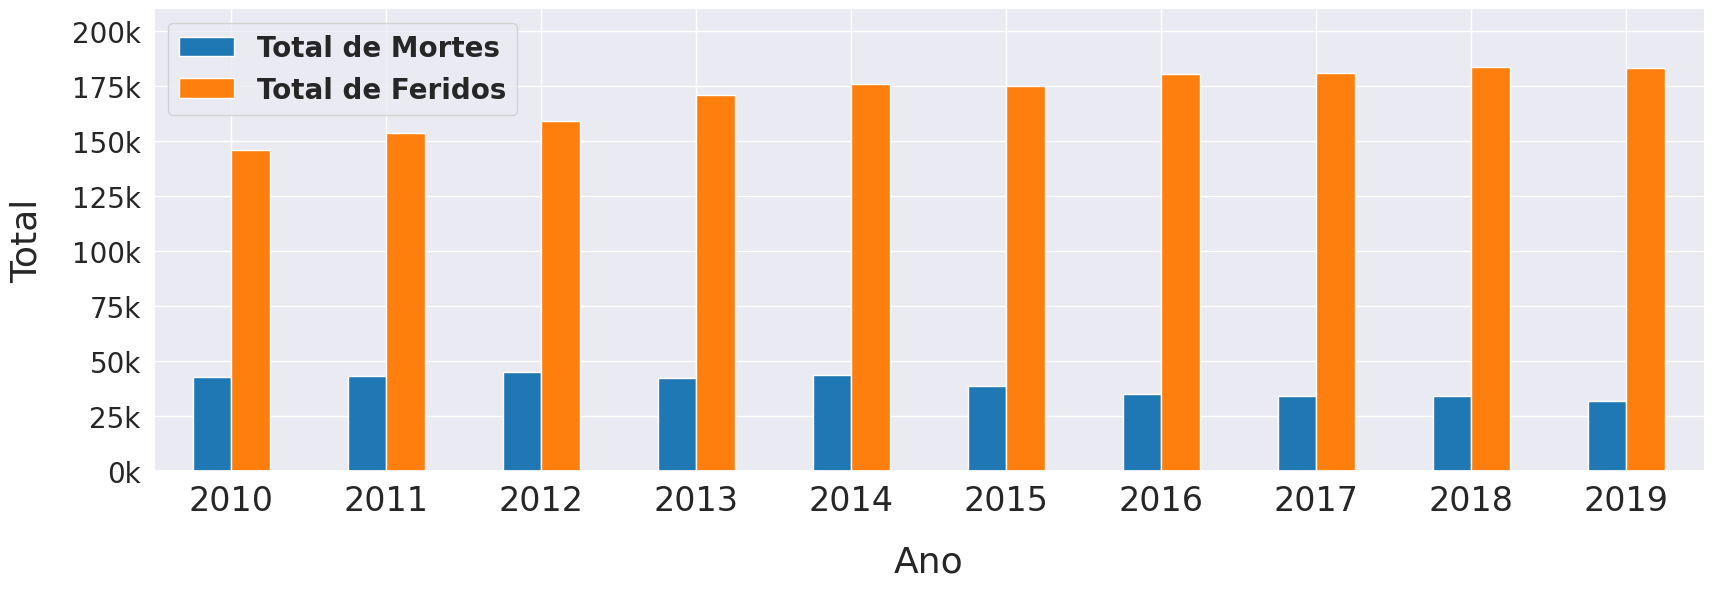

In [69]:
from matplotlib.ticker import FuncFormatter

sns.set_theme()
fig, ax = plt.subplots(figsize=(20, 6))

df_mortes_feridos_ano[['total_mortes', 'total_feridos']].plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])

xlabel = ax.set_xlabel('Ano', fontsize=26, labelpad=20)
ylabel = ax.set_ylabel('Total', fontsize=26, labelpad=20) 

plt.xticks(rotation=0, fontsize=24)

plt.yticks(fontsize=20)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}k'.format(x*1e-3)))

legend = ax.legend(['Total de Mortes', 'Total de Feridos'], fontsize=20)
plt.setp(legend.get_texts(), weight='bold') 

ax.set_ylim(0, 210000)  

sns.despine()

plt.savefig(diretorio_salva_graficos + 'mortes_feridos_ano.png', dpi=300, bbox_inches='tight')

plt.show()

In [70]:
df_acidentes.columns

Index(['Código IBGE', 'ano', 'Região', 'Município', 'Pedestre_mortes',
       'Ciclista_mortes', 'Motociclista_mortes', 'Ocup_triciclo_motor_mortes',
       'Ocup_automovel_mortes', 'Ocup_caminhonete_mortes',
       'Ocup_veic_transp_pesado_mortes', 'Ocup_onibus_mortes', 'Outros_mortes',
       'Populacao', 'total_mortes', 'taxa_mun_mortes',
       'taxa_mun_pedestre_mortes', 'taxa_mun_ciclista_mortes',
       'taxa_mun_motociclista_mortes', 'taxa_mun_automovel_mortes',
       'taxa_mun_veiculo_pesado_mortes', 'taxa_mun_onibus_mortes',
       'taxa_mun_outros_mortes', 'mun_MUNNOME', 'mun_MUNNOMEX', 'mun_AMAZONIA',
       'mun_FRONTEIRA', 'mun_CAPITAL', 'mun_LATITUDE', 'mun_LONGITUDE',
       'mun_ALTITUDE', 'mun_AREA', 'mun_codigo_adotado', 'uf_SIGLA_UF',
       'uf_CODIGO_UF', 'uf_NOME_UF', 'uf_REGIAO', 'mun_coordenadas',
       'Pedestre_feridos', 'Ciclista_feridos', 'Motociclista_feridos',
       'Ocup_triciclo_motor_feridos', 'Ocup_automovel_feridos',
       'Ocup_caminhonete_ferid

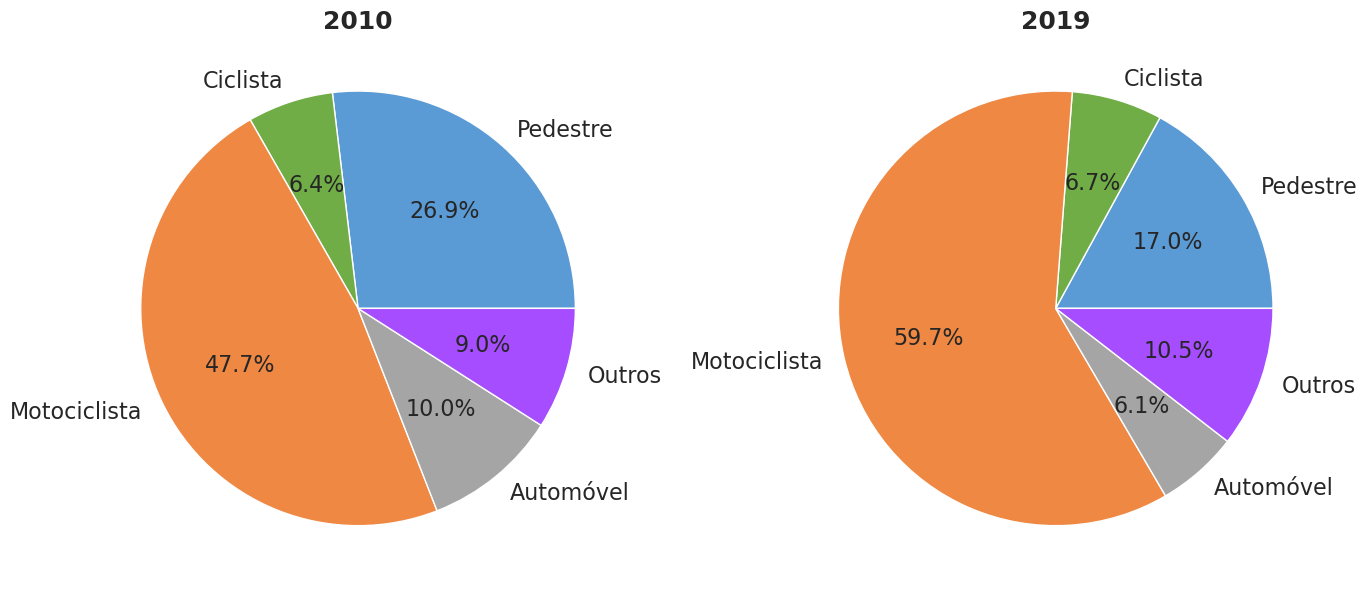

In [71]:
import matplotlib.pyplot as plt

df_2010 = df_acidentes[df_acidentes['ano'] == 2010]
df_2019 = df_acidentes[df_acidentes['ano'] == 2019]

for df in [df_2010, df_2019]:
    df['Outros_feridos'] = df[['Ocup_triciclo_motor_feridos', 'Ocup_caminhonete_feridos', 'Ocup_veic_transp_pesado_feridos', 'Ocup_onibus_feridos', 'Outros_feridos']].sum(axis=1)

feridos_tipo_abreviadas = {
    'Pedestre_feridos': 'Pedestre',
    'Ciclista_feridos': 'Ciclista',
    'Motociclista_feridos': 'Motociclista',
    'Ocup_automovel_feridos': 'Automóvel',
    'Outros_feridos': 'Outros'
}

colors = ['#5b9bd5', '#70ad47','#ef8843','#a5a5a5','#a64dff']

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pie(df_2010[list(feridos_tipo_abreviadas.keys())].sum(), labels=feridos_tipo_abreviadas.values(),
           colors=colors, autopct=lambda p: '{:.1f}%'.format(p), textprops={'fontsize': 16})
axs[0].set_title('2010', fontsize=18, weight='bold')

axs[1].pie(df_2019[list(feridos_tipo_abreviadas.keys())].sum(), labels=feridos_tipo_abreviadas.values(),
           colors=colors, autopct=lambda p: '{:.1f}%'.format(p), textprops={'fontsize': 16})
axs[1].set_title('2019', fontsize=18, weight='bold')

plt.savefig(diretorio_salva_graficos + 'porcentagem_feridos_modos.png', dpi=300, bbox_inches='tight')

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()